In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFitTime, Linescan, ShiftFit,  ReadFit,FinalShiftFit
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot, Correlation_plot,show_intensity_plot, Peak_Data
from bokeh.models import Label
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed

In [2]:
targetdir = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/'

Membraneimage = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/Membrane.tif'

Actinimage = '/Users/aimachine/Documents/Oz-linescan/TestLineScan/Actin.tif'



#Enter time unit in seconds
Time_unit = 1
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 8


#Symmetric psf as input (micrometers)
psf = 0.17

showaftertime = 10
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 40 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)
    
MakePath(targetdir)    
save_dir = targetdir + 'ls_data_time'    
MakePath(save_dir)

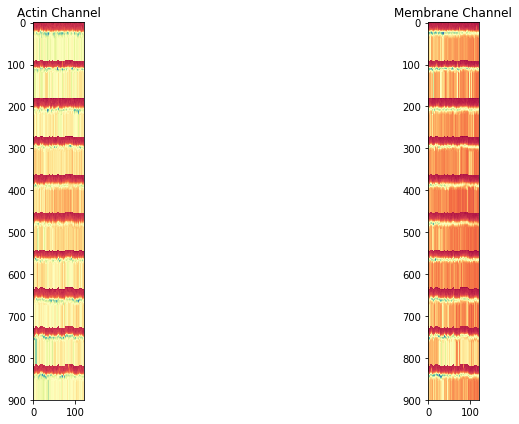

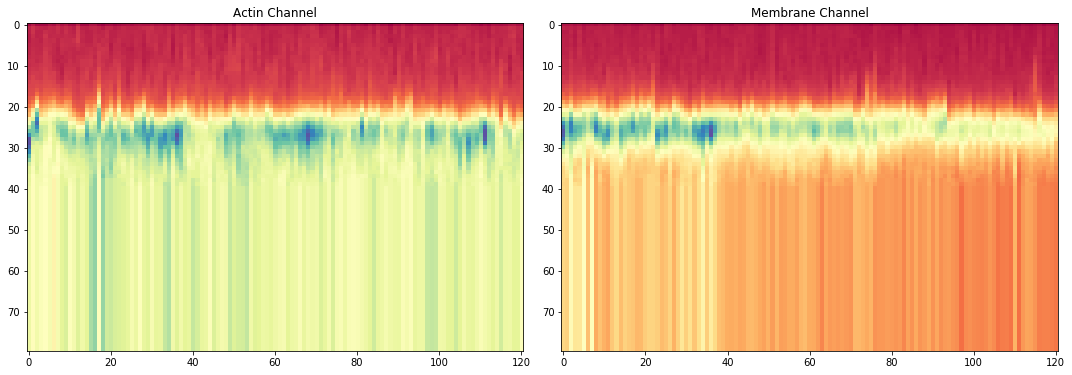

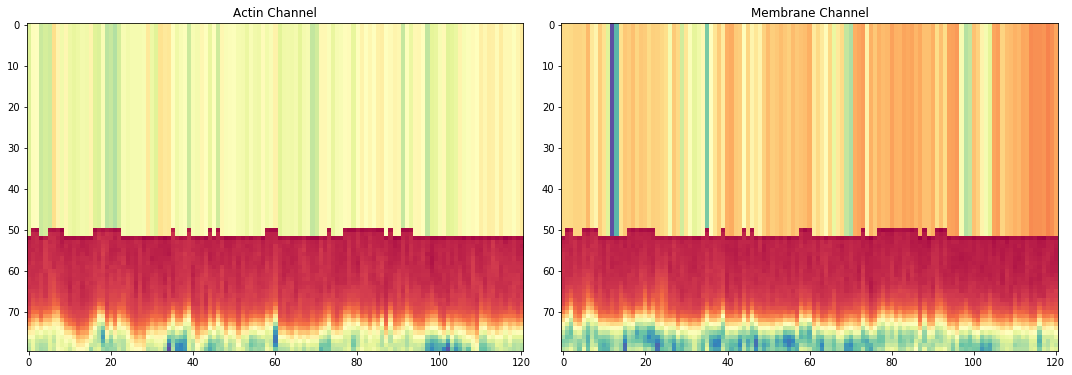

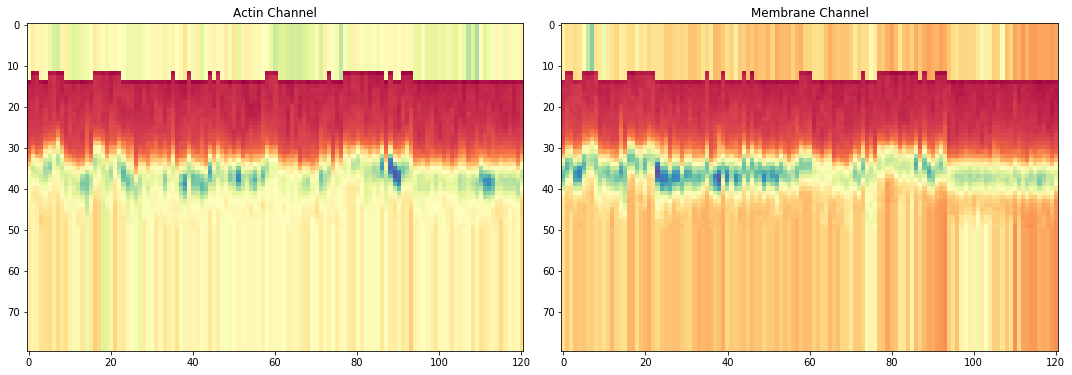

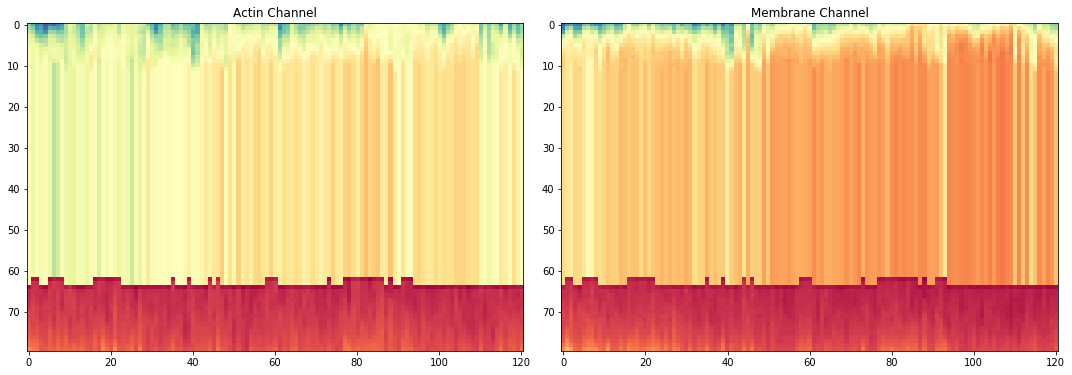

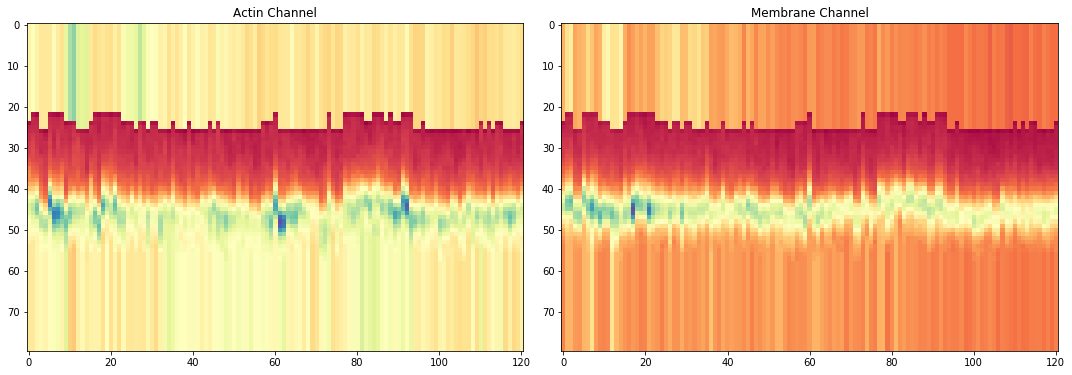

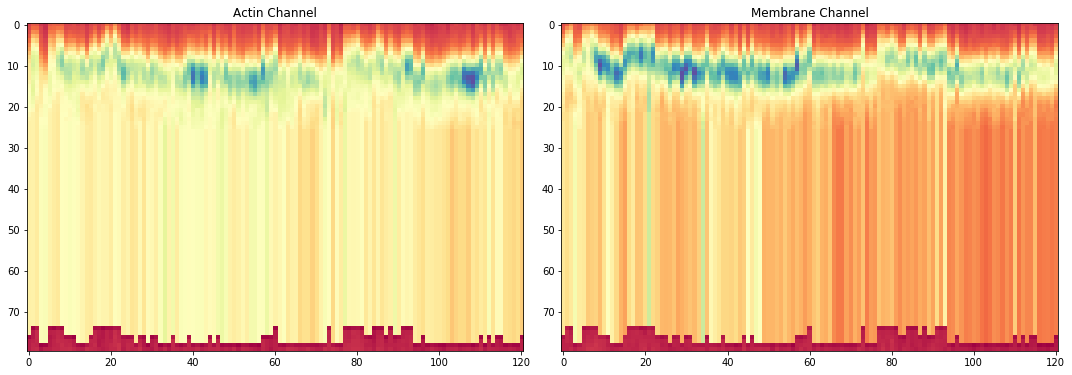

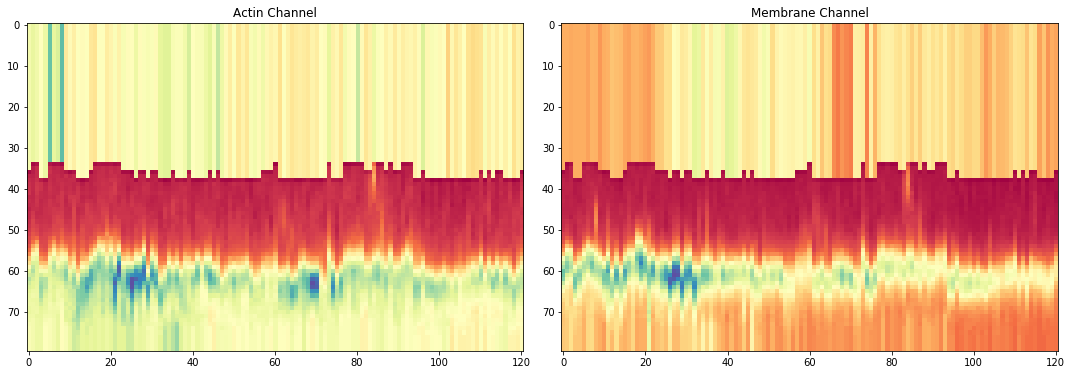

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)
SimTime = Actin.shape[1]
doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]#/np.amax(Actin[i:i + singleblock,:], 0)
   blockMembrane = Membrane[i:i + singleblock,:]#/np.amax(Membrane[i:i + singleblock,:],0)
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)

block id 1 time averaged 0
block id 2 time averaged 0
block id 3 time averaged 0


/Users/aimachine/PyImage/utils/GaussFit.py:608: RuntimeWarning: invalid value encountered in true_divide
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])
/Users/aimachine/PyImage/utils/GaussFit.py:624: RuntimeWarning: invalid value encountered in true_divide
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/aimachine/PyImage/utils/GaussFit.py:626: RuntimeWarning: divide by zero encountered in double_scalars
  x_fwhm_right = (hm - b_right) / m_right


block id 4 time averaged 0
block id 5 time averaged 0
block id 6 time averaged 0
block id 7 time averaged 0
block id 1 time averaged 1
block id 2 time averaged 1
block id 3 time averaged 1


/Users/aimachine/PyImage/utils/GaussFit.py:626: RuntimeWarning: invalid value encountered in double_scalars
  x_fwhm_right = (hm - b_right) / m_right


block id 4 time averaged 1
block id 5 time averaged 1
block id 6 time averaged 1
block id 7 time averaged 1
block id 1 time averaged 2
block id 2 time averaged 2
block id 3 time averaged 2
block id 4 time averaged 2
block id 5 time averaged 2
block id 6 time averaged 2
block id 7 time averaged 2


/Users/aimachine/PyImage/utils/GaussFit.py:624: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
/Users/aimachine/PyImage/utils/GaussFit.py:608: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])


Membrane Fit: (Amp, Sigma, PeakPos, C) [ 16.64308257   0.29627969   0.45190764 126.93242112]
Actin Fit: [  4.96658046   0.21852242   0.63163854 124.56749588]


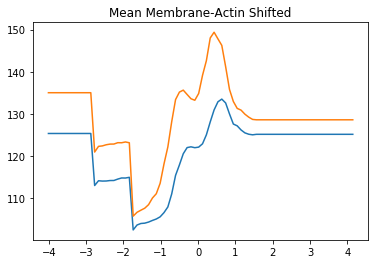

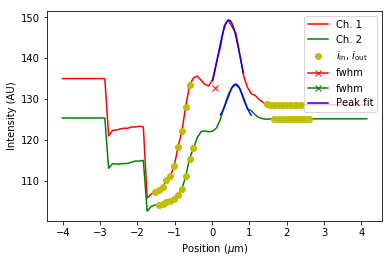

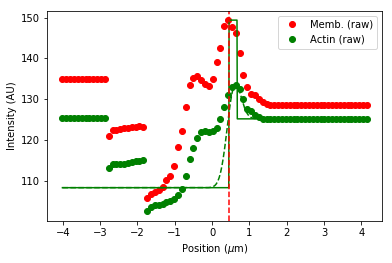

Thickness (nm), center cortex , cortical actin intensity (from fit) 221.39038130623982 0.5626028262819813 149.3724545598057
block id 1 time averaged 3
block id 2 time averaged 3
block id 3 time averaged 3
block id 4 time averaged 3
block id 5 time averaged 3
block id 6 time averaged 3
block id 7 time averaged 3
Membrane Fit: (Amp, Sigma, PeakPos, C) [4.44301510e+01 3.30594514e-01 1.20524062e-07 1.10300045e+02]
Actin Fit: [ 22.74224653   0.34011003   0.18075546 111.19414889]


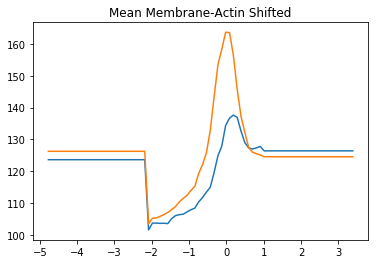

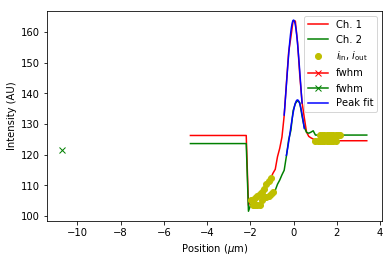

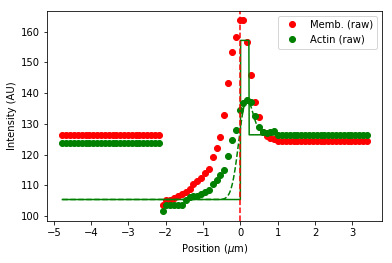

Thickness (nm), center cortex , cortical actin intensity (from fit) 230.7174275073495 0.11535883427773631 157.11213270129514
block id 1 time averaged 4
block id 2 time averaged 4
block id 3 time averaged 4
block id 4 time averaged 4
block id 5 time averaged 4
block id 6 time averaged 4
block id 7 time averaged 4
Membrane Fit: (Amp, Sigma, PeakPos, C) [4.44138338e+01 3.33107963e-01 1.90105804e-07 1.12369844e+02]
Actin Fit: [ 23.84996267   0.329608     0.23809873 109.45031365]


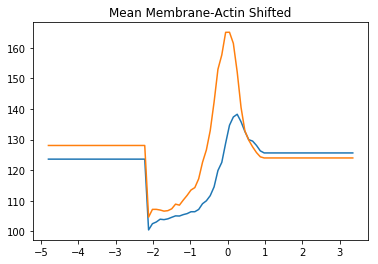

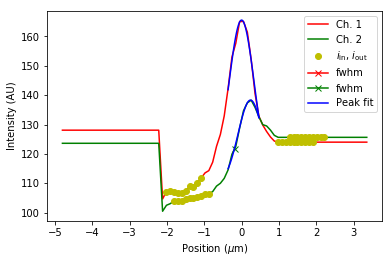

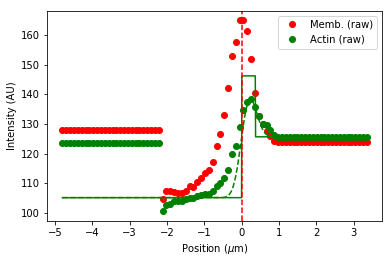

Thickness (nm), center cortex , cortical actin intensity (from fit) 367.2131400538257 0.18360676013271704 146.24916320712424
block id 1 time averaged 5
block id 2 time averaged 5
block id 3 time averaged 5
block id 4 time averaged 5
block id 5 time averaged 5
block id 6 time averaged 5
block id 7 time averaged 5
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.44934049e+01  3.23766512e-01 -4.52169672e-08  1.17090160e+02]
Actin Fit: [1.36383273e+01 2.78539132e-01 6.39993578e-02 1.19978279e+02]


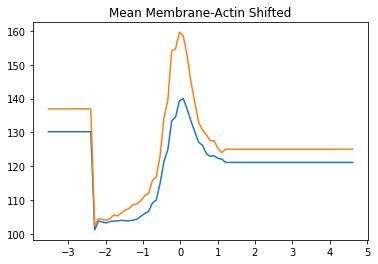

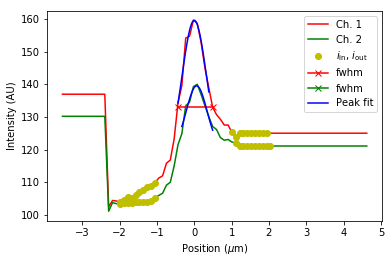

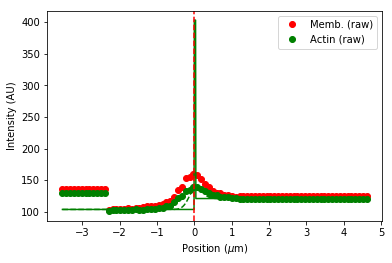

Thickness (nm), center cortex , cortical actin intensity (from fit) 38.27532861477605 0.01913761909042086 403.1334844657376
block id 1 time averaged 6
block id 2 time averaged 6
block id 3 time averaged 6
block id 4 time averaged 6
block id 5 time averaged 6
block id 6 time averaged 6
block id 7 time averaged 6
block id 1 time averaged 7
block id 2 time averaged 7
block id 3 time averaged 7
block id 4 time averaged 7
block id 5 time averaged 7
block id 6 time averaged 7
block id 7 time averaged 7
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.90415827e+01  2.85913083e-01 -9.47664203e-07  1.37734155e+02]
Actin Fit: [2.90145758e+02 8.28127692e-01 1.44711661e-01 9.68993845e+00]


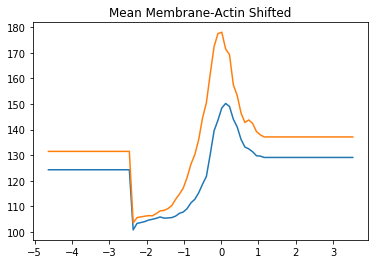

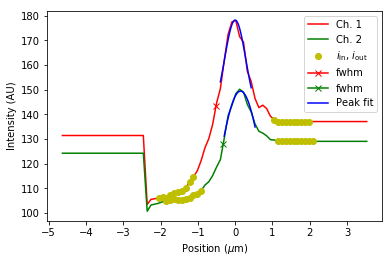

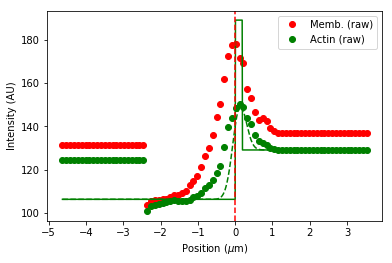

Thickness (nm), center cortex , cortical actin intensity (from fit) 192.82424184243098 0.09641117325701248 189.13577660057115
block id 1 time averaged 8
block id 2 time averaged 8
block id 3 time averaged 8
block id 4 time averaged 8
block id 5 time averaged 8
block id 6 time averaged 8
block id 7 time averaged 8
Membrane Fit: (Amp, Sigma, PeakPos, C) [6.26493186e+01 3.95021925e-01 1.41946264e-06 1.05518559e+02]
Actin Fit: [ 7.64114499e+02  1.26894348e+00  1.32670718e-01 -9.60414883e+01]


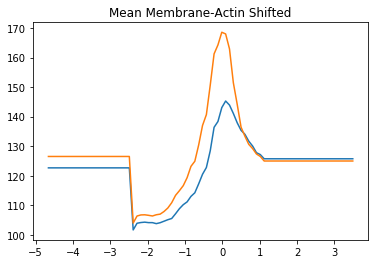

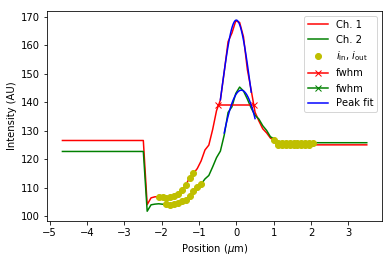

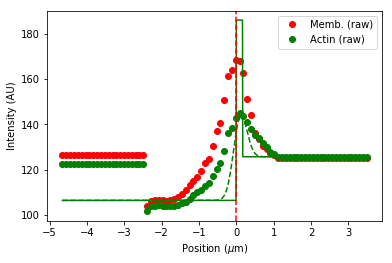

Thickness (nm), center cortex , cortical actin intensity (from fit) 172.50913329142017 0.08625598610834895 186.09740252014373
block id 1 time averaged 9
block id 2 time averaged 9
block id 3 time averaged 9
block id 4 time averaged 9
block id 5 time averaged 9
block id 6 time averaged 9
block id 7 time averaged 9
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 31.21341852   0.37490401   0.45343201 118.38982144]
Actin Fit: [ 23.04296907   0.48364446   0.6574531  113.38865178]


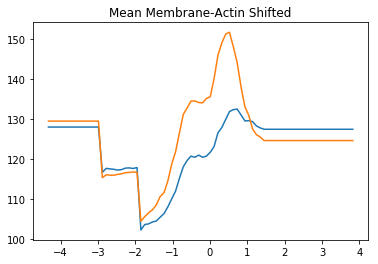

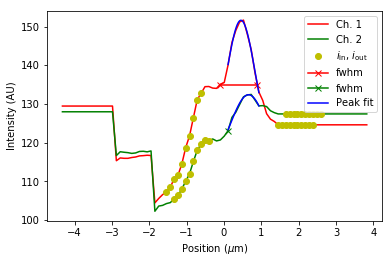

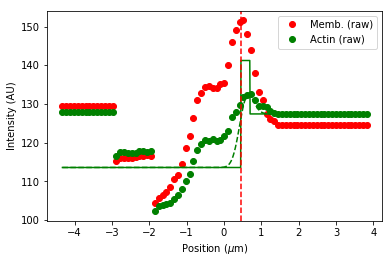

Thickness (nm), center cortex , cortical actin intensity (from fit) 242.66112717996438 0.5747625771814985 141.22994506896495
block id 1 time averaged 10
block id 2 time averaged 10
block id 3 time averaged 10
block id 4 time averaged 10
block id 5 time averaged 10
block id 6 time averaged 10
block id 7 time averaged 10
Membrane Fit: (Amp, Sigma, PeakPos, C) [5.91831975e+01 3.76059241e-01 1.70243931e-06 1.03983046e+02]
Actin Fit: [1.76080074e+01 2.79951402e-01 1.07297887e-01 1.18011894e+02]


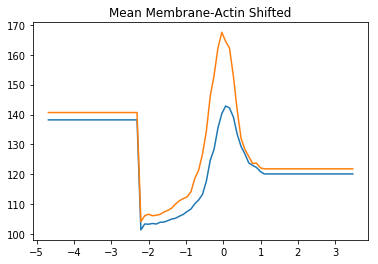

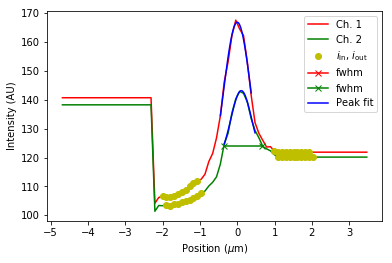

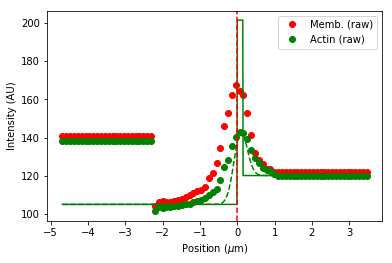

Thickness (nm), center cortex , cortical actin intensity (from fit) 148.11091020941782 0.0740571575440234 201.61145749377036
block id 1 time averaged 11
block id 2 time averaged 11
block id 3 time averaged 11
block id 4 time averaged 11
block id 5 time averaged 11
block id 6 time averaged 11
block id 7 time averaged 11


/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


block id 1 time averaged 12
block id 2 time averaged 12
block id 3 time averaged 12
block id 4 time averaged 12
block id 5 time averaged 12
block id 6 time averaged 12
block id 7 time averaged 12
block id 1 time averaged 13
block id 2 time averaged 13
block id 3 time averaged 13
block id 4 time averaged 13
block id 5 time averaged 13
block id 6 time averaged 13
block id 7 time averaged 13
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 26.12562172   0.42224138   0.49571908 121.31129585]
Actin Fit: [  2.38929949   0.23170033   0.21637369 126.38625498]


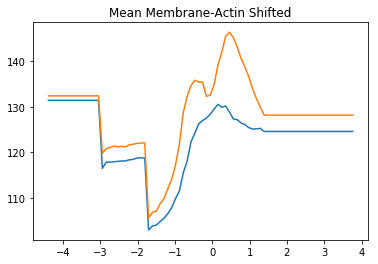

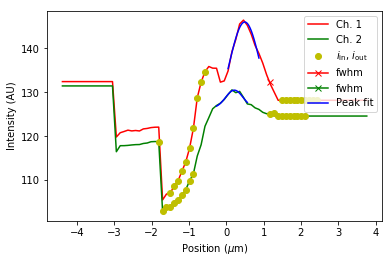

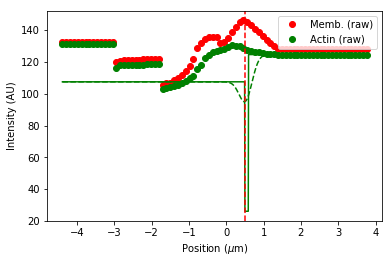

Thickness (nm), center cortex , cortical actin intensity (from fit) 95.91691578939133 0.5436775399952327 26.100031525541652
block id 1 time averaged 14
block id 2 time averaged 14
block id 3 time averaged 14
block id 4 time averaged 14
block id 5 time averaged 14
block id 6 time averaged 14
block id 7 time averaged 14
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.99817137e+01 3.21036881e-01 5.44042944e-07 1.24247636e+02]
Actin Fit: [ 5.08751828e+05  1.21098608e+01  3.30770178e-01 -1.66180924e+04]


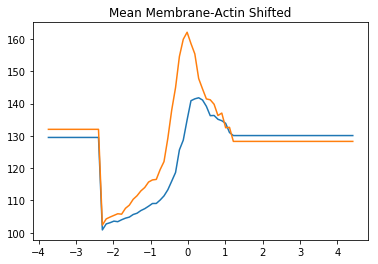

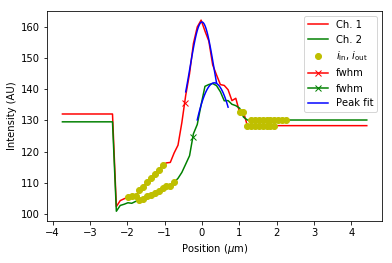

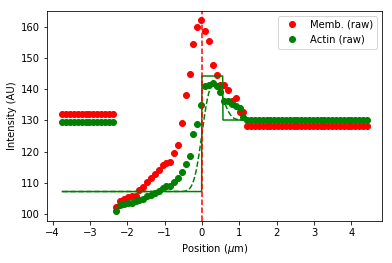

Thickness (nm), center cortex , cortical actin intensity (from fit) 562.2730197836339 0.2811370539347612 144.19696696823232
block id 1 time averaged 15
block id 2 time averaged 15
block id 3 time averaged 15
block id 4 time averaged 15
block id 5 time averaged 15
block id 6 time averaged 15
block id 7 time averaged 15
block id 1 time averaged 16
block id 2 time averaged 16
block id 3 time averaged 16
block id 4 time averaged 16
block id 5 time averaged 16
block id 6 time averaged 16
block id 7 time averaged 16
block id 1 time averaged 17
block id 2 time averaged 17
block id 3 time averaged 17
block id 4 time averaged 17
block id 5 time averaged 17
block id 6 time averaged 17
block id 7 time averaged 17
Membrane Fit: (Amp, Sigma, PeakPos, C) [9.45032698e+01 3.96310985e-01 1.49672941e-06 9.48108101e+01]
Actin Fit: [80.48952983  0.550657    0.41694286 85.15879407]


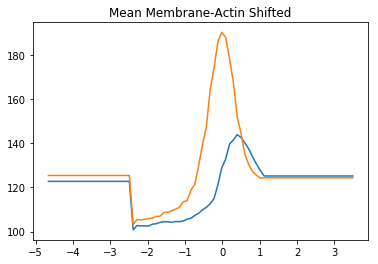

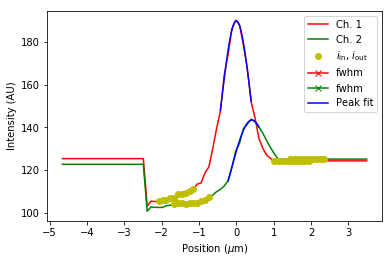

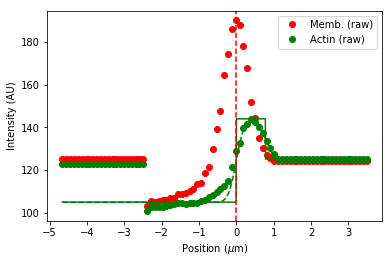

Thickness (nm), center cortex , cortical actin intensity (from fit) 780.0065501757895 0.39000477181730053 144.05807892962244
block id 1 time averaged 18
block id 2 time averaged 18
block id 3 time averaged 18
block id 4 time averaged 18
block id 5 time averaged 18
block id 6 time averaged 18
block id 7 time averaged 18
Membrane Fit: (Amp, Sigma, PeakPos, C) [5.18625238e+01 3.37993678e-01 1.04686252e-06 1.10195247e+02]
Actin Fit: [1.61309526e+01 2.54893754e-01 9.85549574e-02 1.20909975e+02]


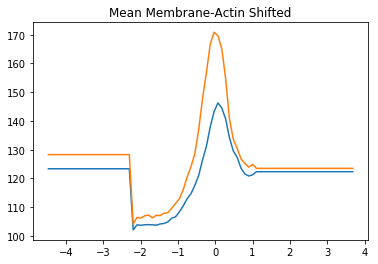

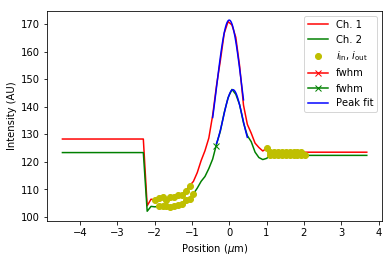

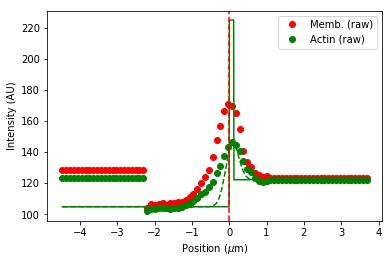

Thickness (nm), center cortex , cortical actin intensity (from fit) 124.5549886839976 0.062278541204516105 224.90783743745823
block id 1 time averaged 19
block id 2 time averaged 19
block id 3 time averaged 19
block id 4 time averaged 19
block id 5 time averaged 19
block id 6 time averaged 19
block id 7 time averaged 19
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.57815609e+01  2.41000936e-01 -3.54649046e-06  1.26354040e+02]
Actin Fit: [1.00158672e+01 2.30097031e-01 5.44106165e-03 1.20587073e+02]


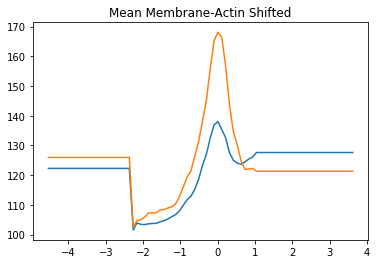

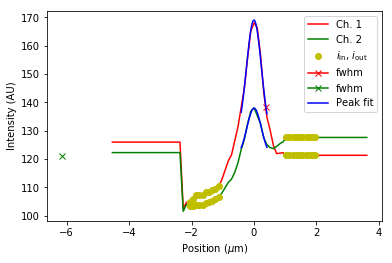

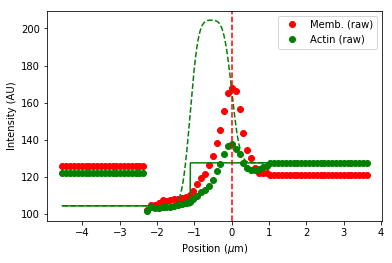

Thickness (nm), center cortex , cortical actin intensity (from fit) 1113.8500625422766 0.5569285777615971 27.590517082133363
block id 1 time averaged 20
block id 2 time averaged 20
block id 3 time averaged 20
block id 4 time averaged 20
block id 5 time averaged 20
block id 6 time averaged 20
block id 7 time averaged 20
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.37996184e+01  2.94915590e-01 -2.72087671e-06  1.18024961e+02]
Actin Fit: [ 11.45376802   0.29084332   0.15712029 120.75452818]


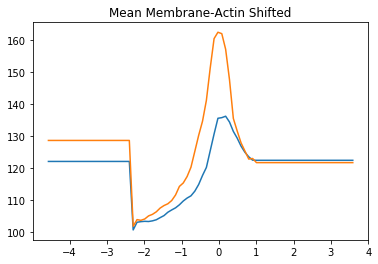

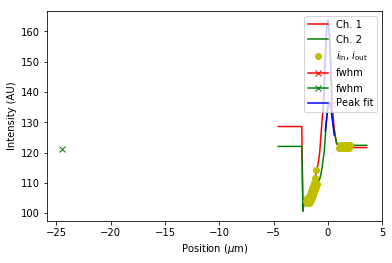

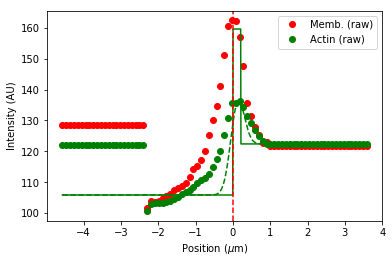

Thickness (nm), center cortex , cortical actin intensity (from fit) 215.6884757198438 0.10784151698321386 159.551115971742
block id 1 time averaged 21
block id 2 time averaged 21
block id 3 time averaged 21
block id 4 time averaged 21
block id 5 time averaged 21
block id 6 time averaged 21
block id 7 time averaged 21
Membrane Fit: (Amp, Sigma, PeakPos, C) [6.31135095e+01 3.47645657e-01 4.73466948e-06 1.10525236e+02]
Actin Fit: [ 1.91305249e+01  3.10742623e-01 -8.88858218e-02  1.19324038e+02]


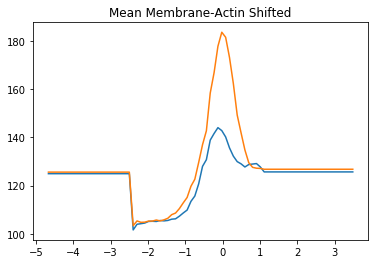

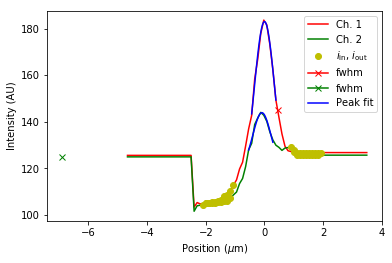

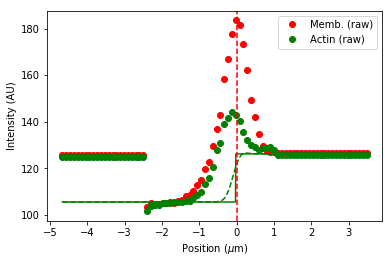

Thickness (nm), center cortex , cortical actin intensity (from fit) 26.307135764901048 0.013148833212970718 28.77689534968016
block id 1 time averaged 22
block id 2 time averaged 22
block id 3 time averaged 22
block id 4 time averaged 22
block id 5 time averaged 22
block id 6 time averaged 22
block id 7 time averaged 22
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 1.83604489e+01  2.58507143e-01 -7.62815440e-06  1.20706114e+02]
Actin Fit: [ 12.50004191   0.28879184   0.15680914 120.35495696]


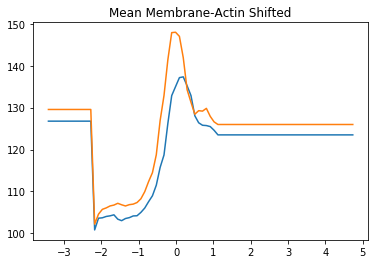

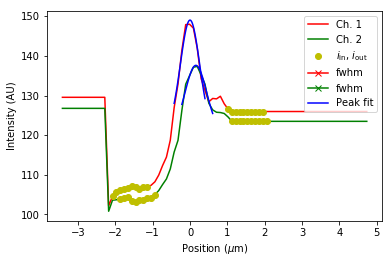

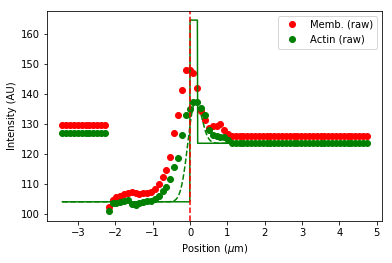

Thickness (nm), center cortex , cortical actin intensity (from fit) 202.78511797614829 0.10138493083367571 164.60063071774078
block id 1 time averaged 23
block id 2 time averaged 23
block id 3 time averaged 23
block id 4 time averaged 23
block id 5 time averaged 23
block id 6 time averaged 23
block id 7 time averaged 23
block id 1 time averaged 24
block id 2 time averaged 24
block id 3 time averaged 24
block id 4 time averaged 24
block id 5 time averaged 24
block id 6 time averaged 24
block id 7 time averaged 24
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 7.14658856e+05  1.44378840e+01  2.79656174e-01 -1.96025584e+04]
Actin Fit: [  3.14657941   0.1979674    0.50278127 125.07984303]


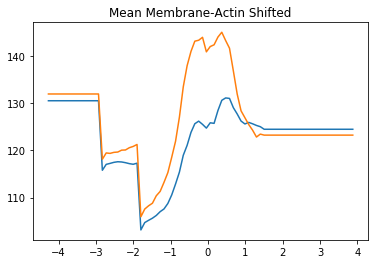

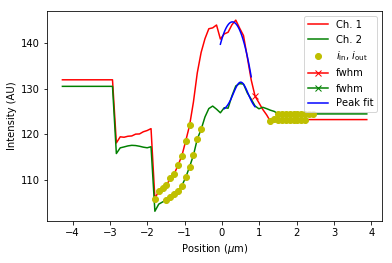

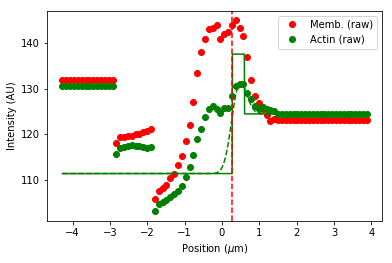

Thickness (nm), center cortex , cortical actin intensity (from fit) 322.15840724318053 0.44073537771909954 137.56994804705545
block id 1 time averaged 25
block id 2 time averaged 25
block id 3 time averaged 25
block id 4 time averaged 25
block id 5 time averaged 25
block id 6 time averaged 25
block id 7 time averaged 25
Membrane Fit: (Amp, Sigma, PeakPos, C) [1.31432941e+02 5.53400831e-01 9.02368156e-07 7.10907917e+01]
Actin Fit: [6.43597872e+00 2.25637791e-01 1.21686180e-01 1.27493808e+02]


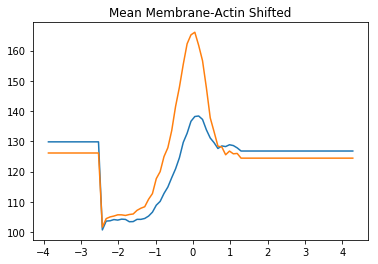

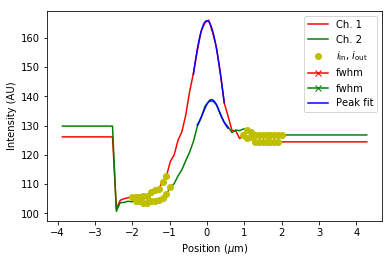

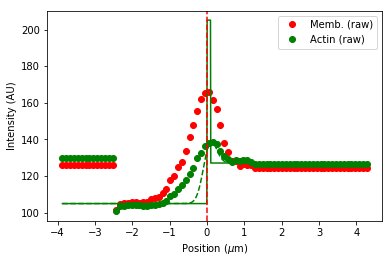

Thickness (nm), center cortex , cortical actin intensity (from fit) 102.52967143530586 0.05126573808580897 205.16514795133565
block id 1 time averaged 26
block id 2 time averaged 26
block id 3 time averaged 26
block id 4 time averaged 26
block id 5 time averaged 26
block id 6 time averaged 26
block id 7 time averaged 26
block id 1 time averaged 27
block id 2 time averaged 27
block id 3 time averaged 27
block id 4 time averaged 27
block id 5 time averaged 27
block id 6 time averaged 27
block id 7 time averaged 27
Membrane Fit: (Amp, Sigma, PeakPos, C) [8.08008958e+01 4.31930014e-01 4.60949216e-07 9.01804874e+01]
Actin Fit: [ 2.94099861e+05  1.04775602e+01  2.16245146e-01 -1.10618550e+04]


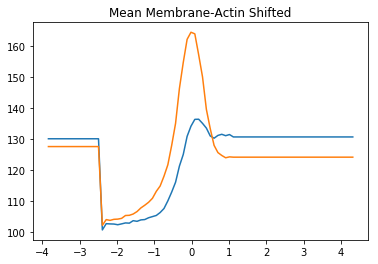

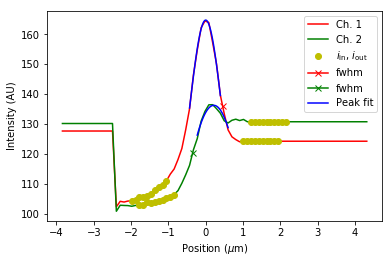

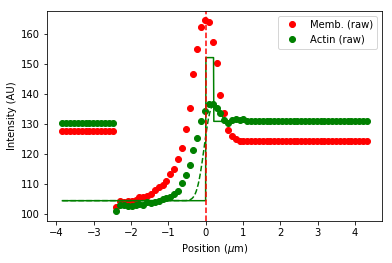

Thickness (nm), center cortex , cortical actin intensity (from fit) 210.73126759022787 0.10536609474432991 152.01619689136677
block id 1 time averaged 28
block id 2 time averaged 28
block id 3 time averaged 28
block id 4 time averaged 28
block id 5 time averaged 28
block id 6 time averaged 28
block id 7 time averaged 28
block id 1 time averaged 29
block id 2 time averaged 29
block id 3 time averaged 29
block id 4 time averaged 29
block id 5 time averaged 29
block id 6 time averaged 29
block id 7 time averaged 29
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.26650700e+01  2.76016292e-01 -7.70271176e-07  1.24884730e+02]
Actin Fit: [ 3.50046054e+04  5.29818382e+00  1.47538346e-01 -2.50293358e+03]


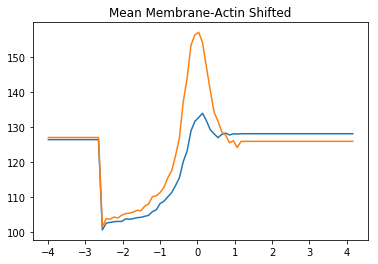

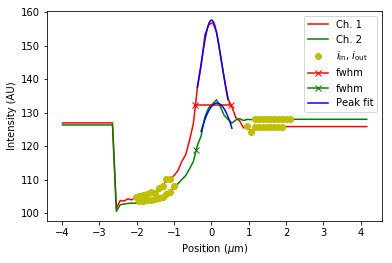

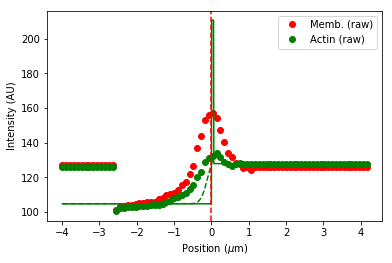

Thickness (nm), center cortex , cortical actin intensity (from fit) 60.91049105245587 0.03045447525505231 210.78126362615382
block id 1 time averaged 30
block id 2 time averaged 30
block id 3 time averaged 30
block id 4 time averaged 30
block id 5 time averaged 30
block id 6 time averaged 30
block id 7 time averaged 30
block id 1 time averaged 31
block id 2 time averaged 31
block id 3 time averaged 31
block id 4 time averaged 31
block id 5 time averaged 31
block id 6 time averaged 31
block id 7 time averaged 31
block id 1 time averaged 32
block id 2 time averaged 32
block id 3 time averaged 32
block id 4 time averaged 32
block id 5 time averaged 32
block id 6 time averaged 32
block id 7 time averaged 32
block id 1 time averaged 33
block id 2 time averaged 33
block id 3 time averaged 33
block id 4 time averaged 33
block id 5 time averaged 33
block id 6 time averaged 33
block id 7 time averaged 33
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.45008292e+01  3.07549232e-01 -3.17993573e-07  1.

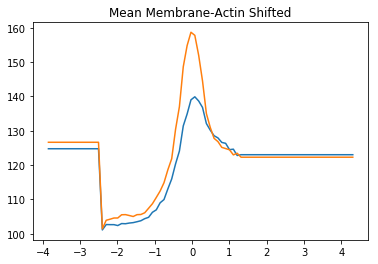

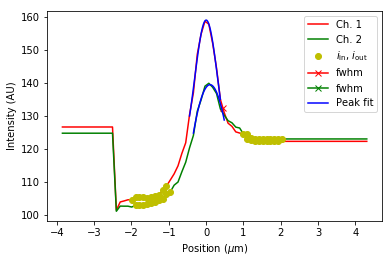

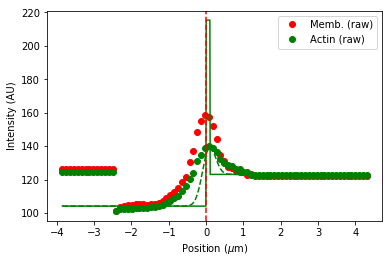

Thickness (nm), center cortex , cortical actin intensity (from fit) 105.07436262959901 0.05253686332122611 215.43970525686316
block id 1 time averaged 34
block id 2 time averaged 34
block id 3 time averaged 34
block id 4 time averaged 34
block id 5 time averaged 34
block id 6 time averaged 34
block id 7 time averaged 34
block id 1 time averaged 35
block id 2 time averaged 35
block id 3 time averaged 35
block id 4 time averaged 35
block id 5 time averaged 35
block id 6 time averaged 35
block id 7 time averaged 35
Membrane Fit: (Amp, Sigma, PeakPos, C) [6.05719969e+01 4.23000392e-01 7.54217449e-07 9.96393283e+01]
Actin Fit: [ 2.17196163e+05  1.03795928e+01  3.12793483e-01 -8.21231087e+03]


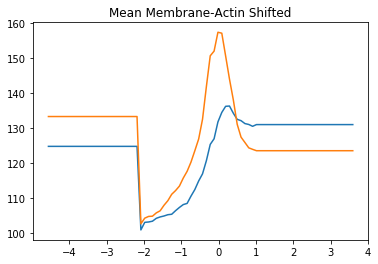

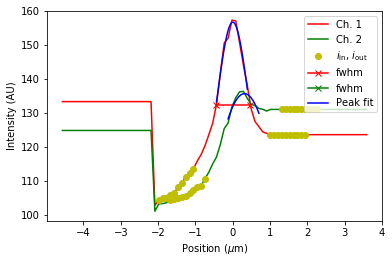

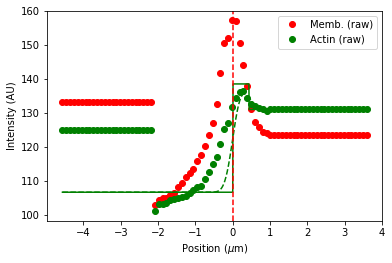

Thickness (nm), center cortex , cortical actin intensity (from fit) 431.8948287539082 0.21594816859440277 138.54684984808844
block id 1 time averaged 36
block id 2 time averaged 36
block id 3 time averaged 36
block id 4 time averaged 36
block id 5 time averaged 36
block id 6 time averaged 36
block id 7 time averaged 36
block id 1 time averaged 37
block id 2 time averaged 37
block id 3 time averaged 37
block id 4 time averaged 37
block id 5 time averaged 37
block id 6 time averaged 37
block id 7 time averaged 37
block id 1 time averaged 38
block id 2 time averaged 38
block id 3 time averaged 38
block id 4 time averaged 38
block id 5 time averaged 38
block id 6 time averaged 38
block id 7 time averaged 38
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 7.51551351e+05  1.33864956e+01 -3.34264281e-01 -2.22554650e+04]
Actin Fit: [  2.64739263   0.23649854   0.65884759 124.36216255]


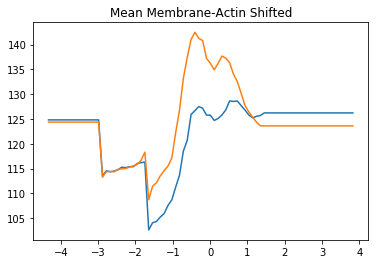

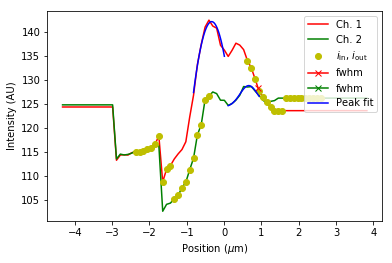

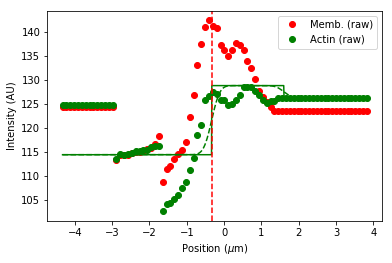

Thickness (nm), center cortex , cortical actin intensity (from fit) 1935.1507150830405 0.6333110762419714 128.82796976177886
block id 1 time averaged 39
block id 2 time averaged 39
block id 3 time averaged 39
block id 4 time averaged 39
block id 5 time averaged 39
block id 6 time averaged 39
block id 7 time averaged 39
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 5.57805265e+01  3.81928681e-01 -3.71041369e-06  9.70858362e+01]
Actin Fit: [9.47845732e+00 2.36592749e-01 4.28522266e-02 1.21571889e+02]


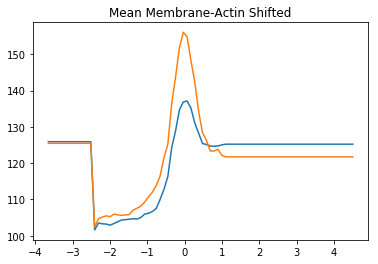

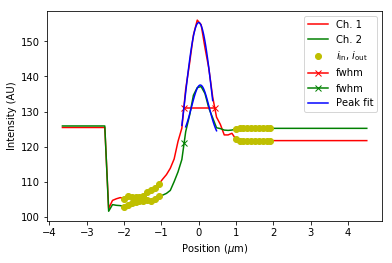

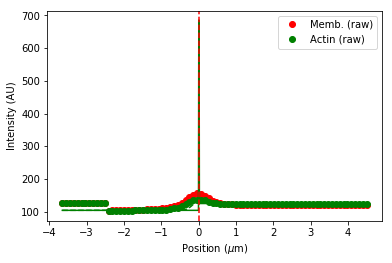

Thickness (nm), center cortex , cortical actin intensity (from fit) 15.801636496120063 0.007897107834372976 685.5833358865278
block id 1 time averaged 40
block id 2 time averaged 40
block id 3 time averaged 40
block id 4 time averaged 40
block id 5 time averaged 40
block id 6 time averaged 40
block id 7 time averaged 40
block id 1 time averaged 41
block id 2 time averaged 41
block id 3 time averaged 41
block id 4 time averaged 41
block id 5 time averaged 41
block id 6 time averaged 41
block id 7 time averaged 41
block id 1 time averaged 42
block id 2 time averaged 42
block id 3 time averaged 42
block id 4 time averaged 42
block id 5 time averaged 42
block id 6 time averaged 42
block id 7 time averaged 42
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 4.20316837e+01  3.33344390e-01 -2.03601827e-07  1.13823264e+02]
Actin Fit: [ 45.28945495   0.44797958   0.20453933 103.17815332]


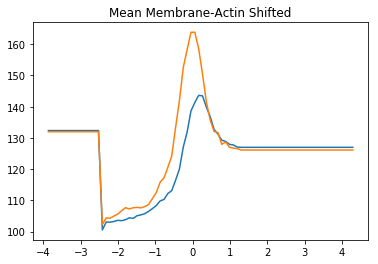

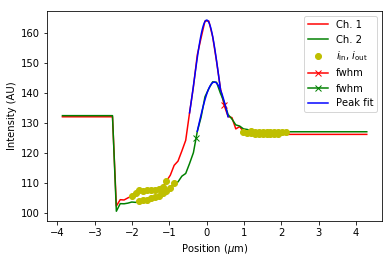

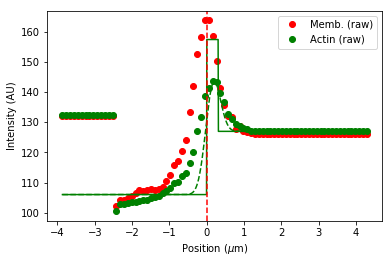

Thickness (nm), center cortex , cortical actin intensity (from fit) 312.0779299124094 0.1560387613543778 157.39849164390895
block id 1 time averaged 43
block id 2 time averaged 43
block id 3 time averaged 43
block id 4 time averaged 43
block id 5 time averaged 43
block id 6 time averaged 43
block id 7 time averaged 43
block id 1 time averaged 44
block id 2 time averaged 44
block id 3 time averaged 44
block id 4 time averaged 44
block id 5 time averaged 44
block id 6 time averaged 44
block id 7 time averaged 44
Membrane Fit: (Amp, Sigma, PeakPos, C) [  6.6640094    0.23022403   0.56828598 129.8259596 ]
Actin Fit: [ 19.22919504   0.54085656   0.6344321  115.90309441]


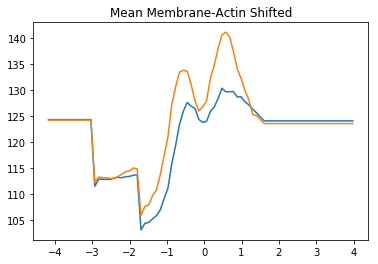

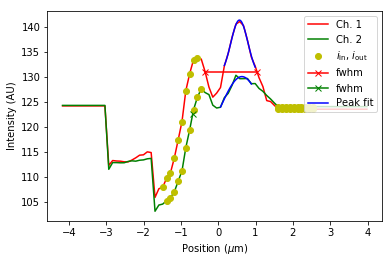

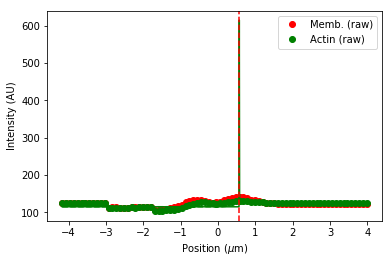

Thickness (nm), center cortex , cortical actin intensity (from fit) 8.465979863314722 0.5725189664425505 615.120677909798
block id 1 time averaged 45
block id 2 time averaged 45
block id 3 time averaged 45
block id 4 time averaged 45
block id 5 time averaged 45
block id 6 time averaged 45
block id 7 time averaged 45
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.81512826e+01 3.09074576e-01 3.40541972e-07 1.20375526e+02]
Actin Fit: [ 5.42114837e+02  1.18912155e+00  1.28769069e-01 -4.55871445e+01]


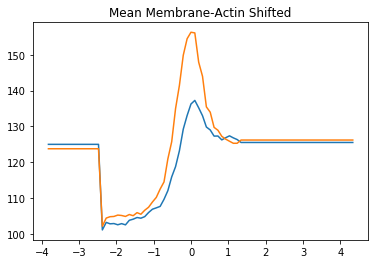

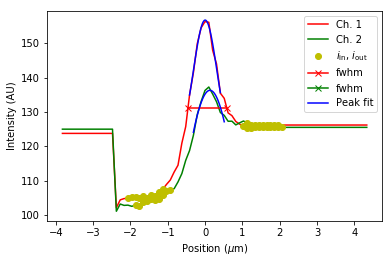

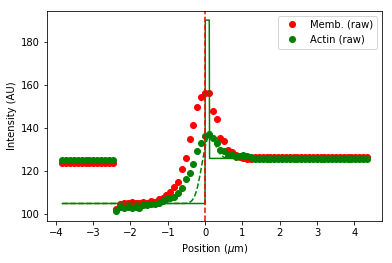

Thickness (nm), center cortex , cortical actin intensity (from fit) 112.42659617265849 0.05621363862830138 190.1297854541058
block id 1 time averaged 46
block id 2 time averaged 46
block id 3 time averaged 46
block id 4 time averaged 46
block id 5 time averaged 46
block id 6 time averaged 46
block id 7 time averaged 46
block id 1 time averaged 47
block id 2 time averaged 47
block id 3 time averaged 47
block id 4 time averaged 47
block id 5 time averaged 47
block id 6 time averaged 47
block id 7 time averaged 47
block id 1 time averaged 48
block id 2 time averaged 48
block id 3 time averaged 48
block id 4 time averaged 48
block id 5 time averaged 48
block id 6 time averaged 48
block id 7 time averaged 48
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 15.96183751   0.31322356   0.58327187 122.64698642]
Actin Fit: [ 27.84839994   0.47093233   0.66460993 110.62633171]


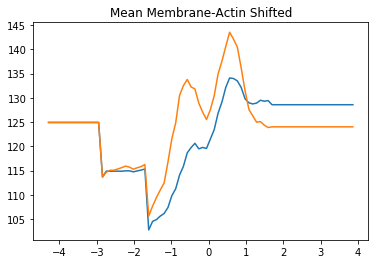

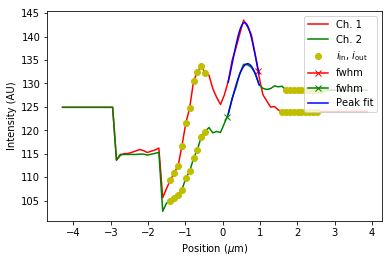

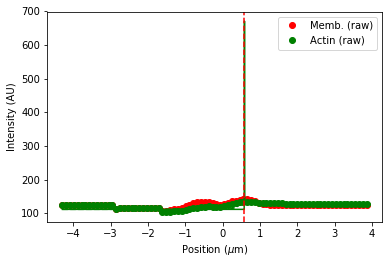

Thickness (nm), center cortex , cortical actin intensity (from fit) 9.607207872327953 0.5880754727996556 670.4632169890662
block id 1 time averaged 49
block id 2 time averaged 49
block id 3 time averaged 49
block id 4 time averaged 49
block id 5 time averaged 49
block id 6 time averaged 49
block id 7 time averaged 49
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 5.63626896e+01  3.64881169e-01 -1.40643269e-06  1.03443018e+02]
Actin Fit: [ 2.04080465e+01  3.12667336e-01 -1.31675492e-02  1.15365325e+02]


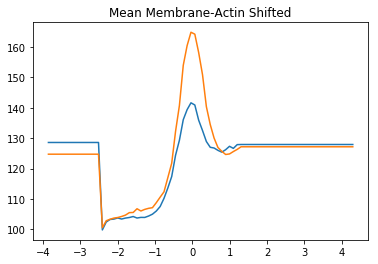

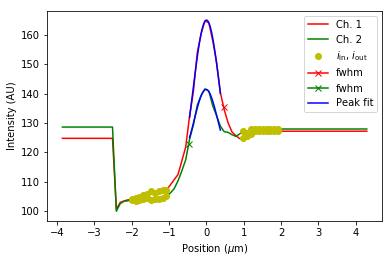

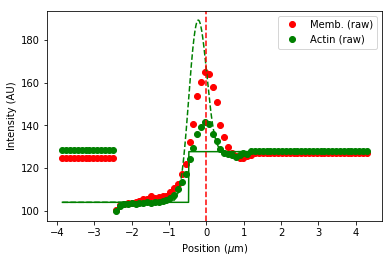

Thickness (nm), center cortex , cortical actin intensity (from fit) 472.6627463265691 0.23633277959596966 28.280921112287043
block id 1 time averaged 50
block id 2 time averaged 50
block id 3 time averaged 50
block id 4 time averaged 50
block id 5 time averaged 50
block id 6 time averaged 50
block id 7 time averaged 50
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.11298973e+01  2.64396565e-01 -1.85684492e-08  1.26370047e+02]
Actin Fit: [1.19588673e+02 6.65583883e-01 1.10118907e-01 6.38880007e+01]


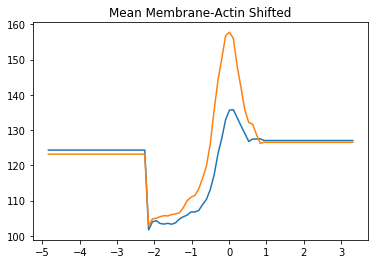

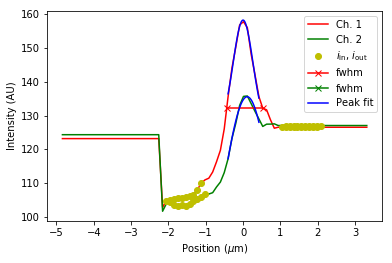

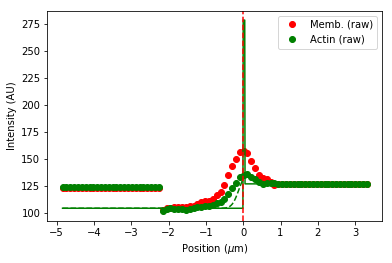

Thickness (nm), center cortex , cortical actin intensity (from fit) 46.09138690041049 0.023045674881756007 278.77975593483137
block id 1 time averaged 51
block id 2 time averaged 51
block id 3 time averaged 51
block id 4 time averaged 51
block id 5 time averaged 51
block id 6 time averaged 51
block id 7 time averaged 51
block id 1 time averaged 52
block id 2 time averaged 52
block id 3 time averaged 52
block id 4 time averaged 52
block id 5 time averaged 52
block id 6 time averaged 52
block id 7 time averaged 52
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.26829674e+01  3.29563893e-01 -5.41557418e-07  1.18119280e+02]
Actin Fit: [140.8787955    0.93154137   0.25647247  71.61898464]


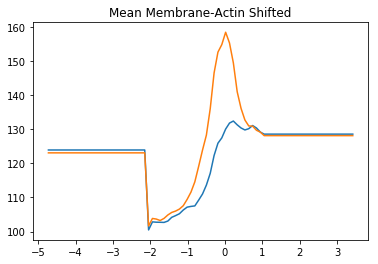

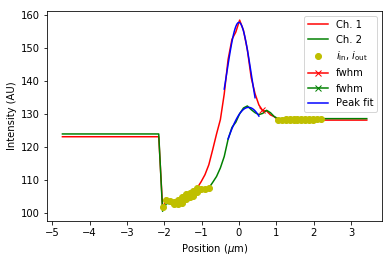

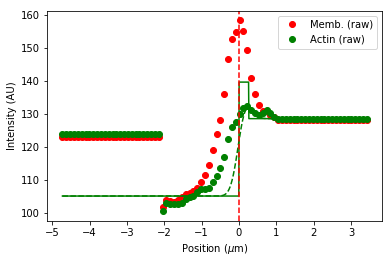

Thickness (nm), center cortex , cortical actin intensity (from fit) 262.0325246537432 0.13101572076945361 139.6051656667058
block id 1 time averaged 53
block id 2 time averaged 53
block id 3 time averaged 53
block id 4 time averaged 53
block id 5 time averaged 53
block id 6 time averaged 53
block id 7 time averaged 53
block id 1 time averaged 54
block id 2 time averaged 54
block id 3 time averaged 54
block id 4 time averaged 54
block id 5 time averaged 54
block id 6 time averaged 54
block id 7 time averaged 54
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 38.29483551   0.48302258   0.5601907  106.46213585]
Actin Fit: [  8.45980369   0.32459596   0.73034182 118.50782483]


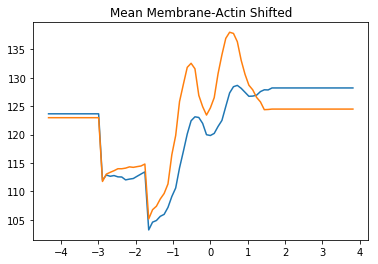

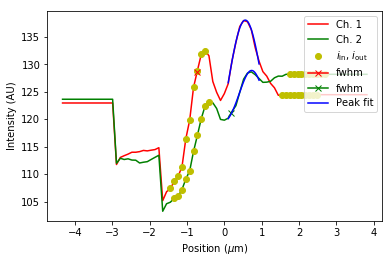

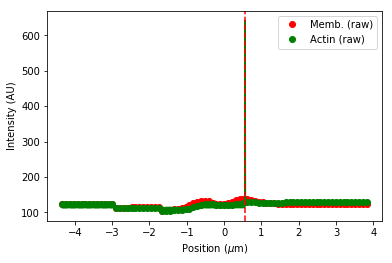

Thickness (nm), center cortex , cortical actin intensity (from fit) 4.0048111714577805 0.5621931035765412 643.2910290359773
block id 1 time averaged 55
block id 2 time averaged 55
block id 3 time averaged 55
block id 4 time averaged 55
block id 5 time averaged 55
block id 6 time averaged 55
block id 7 time averaged 55
block id 1 time averaged 56
block id 2 time averaged 56
block id 3 time averaged 56
block id 4 time averaged 56
block id 5 time averaged 56
block id 6 time averaged 56
block id 7 time averaged 56
block id 1 time averaged 57
block id 2 time averaged 57
block id 3 time averaged 57
block id 4 time averaged 57
block id 5 time averaged 57
block id 6 time averaged 57
block id 7 time averaged 57
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.76265146e+01  3.33384308e-01 -1.97782195e-08  1.11270797e+02]
Actin Fit: [2.80534751e+01 3.37499789e-01 7.82921967e-02 1.09812098e+02]


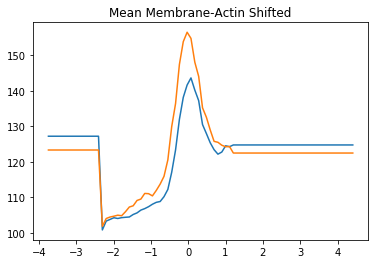

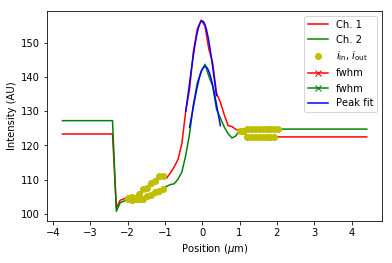

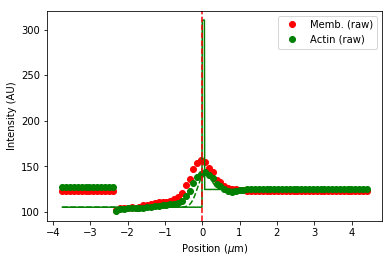

Thickness (nm), center cortex , cortical actin intensity (from fit) 58.95781767167641 0.02947888905761873 310.46546737318346
block id 1 time averaged 58
block id 2 time averaged 58
block id 3 time averaged 58
block id 4 time averaged 58
block id 5 time averaged 58
block id 6 time averaged 58
block id 7 time averaged 58
block id 1 time averaged 59
block id 2 time averaged 59
block id 3 time averaged 59
block id 4 time averaged 59
block id 5 time averaged 59
block id 6 time averaged 59
block id 7 time averaged 59
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 7.95206347e+01  4.57846986e-01 -3.68179956e-07  9.37312311e+01]
Actin Fit: [9.14206417e+01 5.92940425e-01 5.93123130e-02 8.14315251e+01]


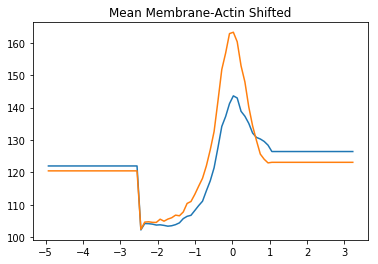

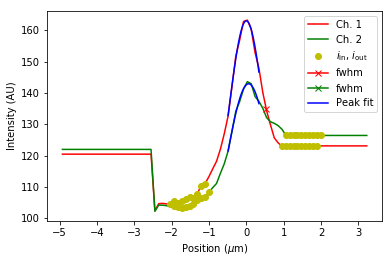

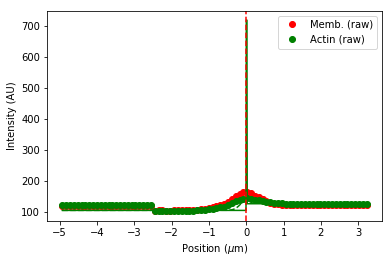

Thickness (nm), center cortex , cortical actin intensity (from fit) 18.269191983037057 0.00913422781156252 718.1225557053643
block id 1 time averaged 60
block id 2 time averaged 60
block id 3 time averaged 60
block id 4 time averaged 60
block id 5 time averaged 60
block id 6 time averaged 60
block id 7 time averaged 60
Membrane Fit: (Amp, Sigma, PeakPos, C) [3.60877877e+01 3.19030070e-01 9.82422145e-07 1.18332550e+02]
Actin Fit: [1.84756971e+01 2.92463865e-01 7.41109901e-02 1.21928876e+02]


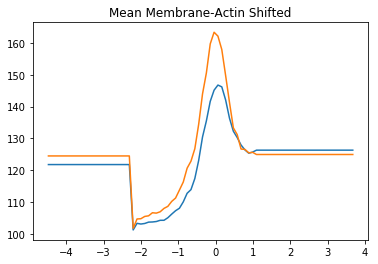

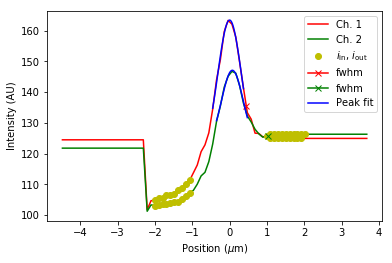

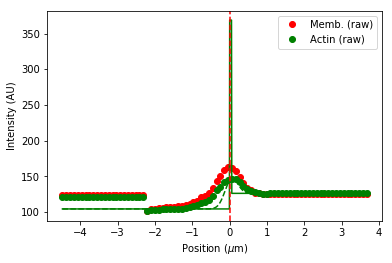

Thickness (nm), center cortex , cortical actin intensity (from fit) 51.44680334726953 0.025724384095779415 368.948368275799
block id 1 time averaged 61
block id 2 time averaged 61
block id 3 time averaged 61
block id 4 time averaged 61
block id 5 time averaged 61
block id 6 time averaged 61
block id 7 time averaged 61


/Users/aimachine/PyImage/utils/GaussFit.py:684: RuntimeWarning: invalid value encountered in log
  (self.actin.i_in - i_c_start  ))))


Membrane Fit: (Amp, Sigma, PeakPos, C) [4.23077642e+01 3.43318259e-01 1.00810698e-06 1.06100699e+02]
Actin Fit: [4.06027350e+01 3.46560813e-01 1.02493385e-01 1.08262883e+02]


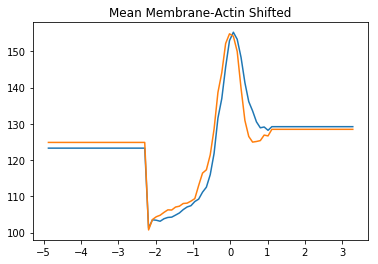

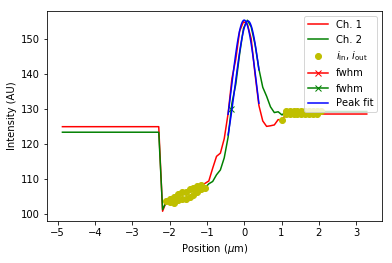

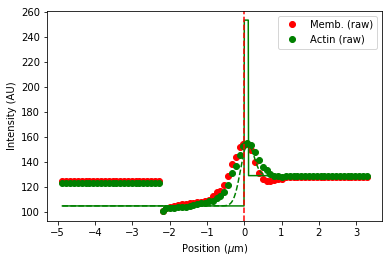

Thickness (nm), center cortex , cortical actin intensity (from fit) 117.07827160838063 0.058540143911165625 253.45372974597137
block id 1 time averaged 62
block id 2 time averaged 62
block id 3 time averaged 62
block id 4 time averaged 62
block id 5 time averaged 62
block id 6 time averaged 62
block id 7 time averaged 62
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.24606325e+01  3.12088711e-01 -3.52905949e-08  1.19316096e+02]
Actin Fit: [3.09982376e+01 3.18529007e-01 1.05799916e-01 1.12759800e+02]


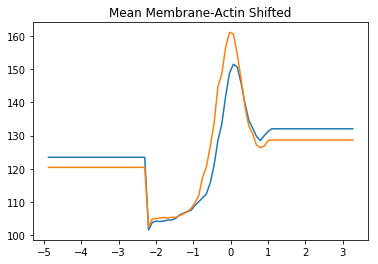

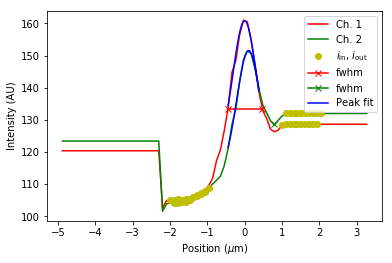

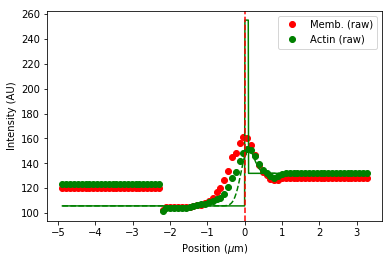

Thickness (nm), center cortex , cortical actin intensity (from fit) 98.43006816125552 0.049214998790032834 254.93284130422018
block id 1 time averaged 63
block id 2 time averaged 63
block id 3 time averaged 63
block id 4 time averaged 63
block id 5 time averaged 63
block id 6 time averaged 63
block id 7 time averaged 63
block id 1 time averaged 64
block id 2 time averaged 64
block id 3 time averaged 64
block id 4 time averaged 64
block id 5 time averaged 64
block id 6 time averaged 64
block id 7 time averaged 64
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.89012958e+01 3.16340276e-01 4.59060831e-06 1.17959275e+02]
Actin Fit: [2.08808399e+01 3.27148366e-01 7.04931818e-03 1.17172370e+02]


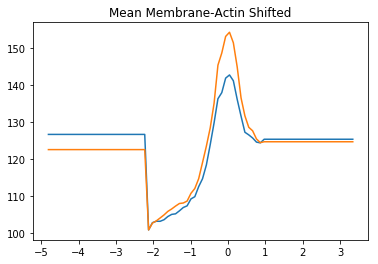

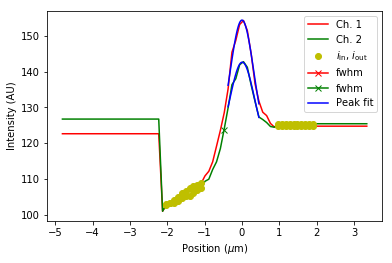

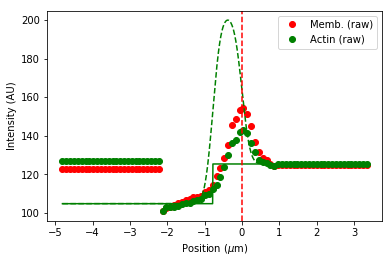

Thickness (nm), center cortex , cortical actin intensity (from fit) 779.3403996734406 0.3896656092284114 28.527117444830022
block id 1 time averaged 65
block id 2 time averaged 65
block id 3 time averaged 65
block id 4 time averaged 65
block id 5 time averaged 65
block id 6 time averaged 65
block id 7 time averaged 65
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.79925102e+01 2.96279125e-01 1.60871582e-06 1.19265563e+02]
Actin Fit: [6.62480468e+00 2.06832074e-01 4.46637669e-02 1.30986521e+02]


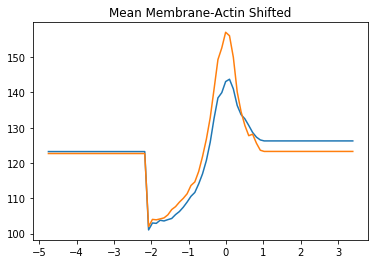

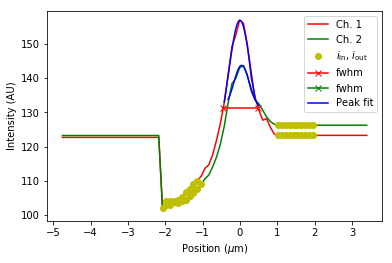

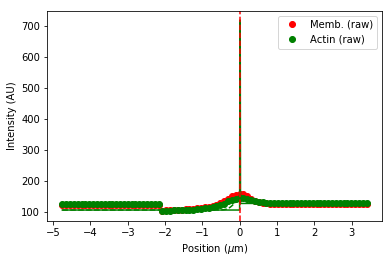

Thickness (nm), center cortex , cortical actin intensity (from fit) 18.971321330279103 0.009487269380960018 718.6058777845059
block id 1 time averaged 66
block id 2 time averaged 66
block id 3 time averaged 66
block id 4 time averaged 66
block id 5 time averaged 66
block id 6 time averaged 66
block id 7 time averaged 66
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.14873366e+01  2.63490548e-01 -2.96771413e-06  1.20594583e+02]
Actin Fit: [ 2.84177769e+05  8.85544480e+00  6.04091529e-02 -1.26638370e+04]


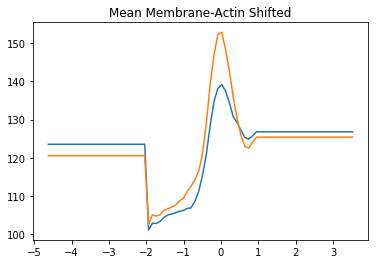

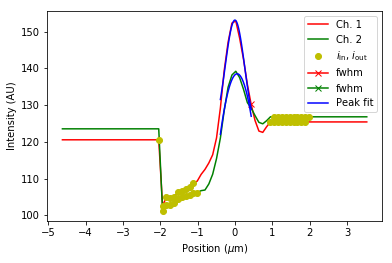

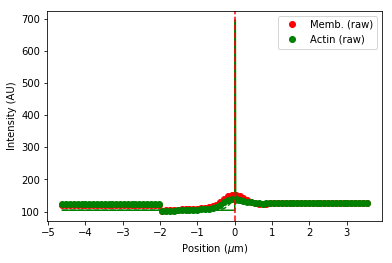

Thickness (nm), center cortex , cortical actin intensity (from fit) 15.484162217524267 0.007739113394631341 696.0197430080498
block id 1 time averaged 67
block id 2 time averaged 67
block id 3 time averaged 67
block id 4 time averaged 67
block id 5 time averaged 67
block id 6 time averaged 67
block id 7 time averaged 67
Membrane Fit: (Amp, Sigma, PeakPos, C) [1.61874931e+01 2.82746094e-01 2.83164309e-06 1.20647148e+02]
Actin Fit: [ 24.82432371   0.39337929   0.16885819 110.99354203]


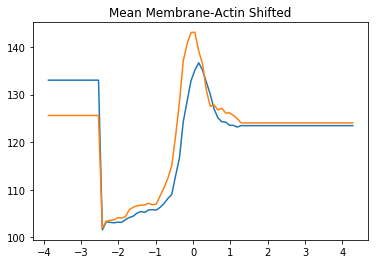

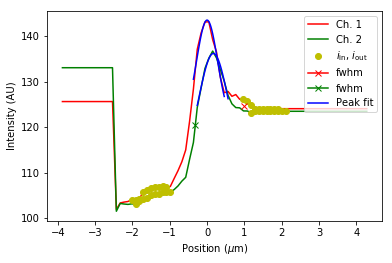

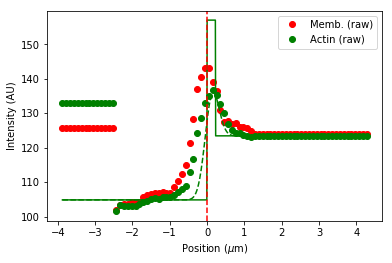

Thickness (nm), center cortex , cortical actin intensity (from fit) 224.09318803034304 0.11204942565825939 157.05718182384643
block id 1 time averaged 68
block id 2 time averaged 68
block id 3 time averaged 68
block id 4 time averaged 68
block id 5 time averaged 68
block id 6 time averaged 68
block id 7 time averaged 68
block id 1 time averaged 69
block id 2 time averaged 69
block id 3 time averaged 69
block id 4 time averaged 69
block id 5 time averaged 69
block id 6 time averaged 69
block id 7 time averaged 69
Membrane Fit: (Amp, Sigma, PeakPos, C) [9.70138204e+00 2.12596491e-01 5.79088208e-07 1.27740592e+02]
Actin Fit: [ 5.68319974e+04  6.54295976e+00  1.73464394e-01 -3.33515502e+03]


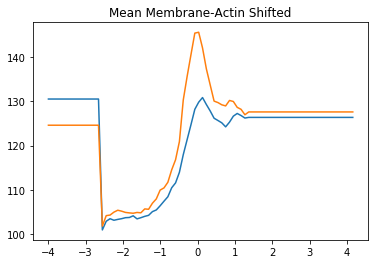

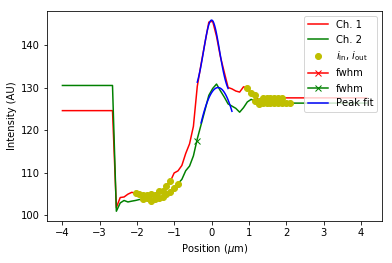

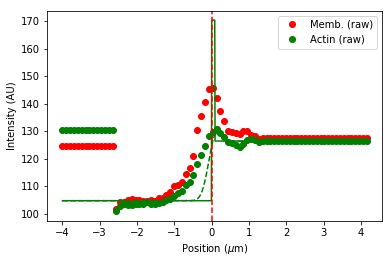

Thickness (nm), center cortex , cortical actin intensity (from fit) 90.27791855384015 0.0451395383651282 170.3834585251512
block id 1 time averaged 70
block id 2 time averaged 70
block id 3 time averaged 70
block id 4 time averaged 70
block id 5 time averaged 70
block id 6 time averaged 70
block id 7 time averaged 70
block id 1 time averaged 71
block id 2 time averaged 71
block id 3 time averaged 71
block id 4 time averaged 71
block id 5 time averaged 71
block id 6 time averaged 71
block id 7 time averaged 71
block id 1 time averaged 72
block id 2 time averaged 72
block id 3 time averaged 72
block id 4 time averaged 72
block id 5 time averaged 72
block id 6 time averaged 72
block id 7 time averaged 72
Membrane Fit: (Amp, Sigma, PeakPos, C) [9.48062914e+01 4.99773149e-01 9.10698131e-08 7.82113253e+01]
Actin Fit: [ 31.07428935   0.41370769   0.22856575 107.47627938]


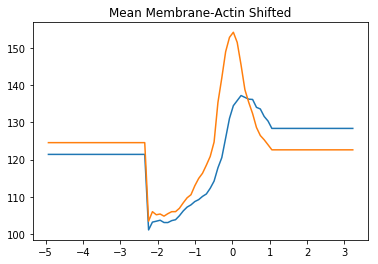

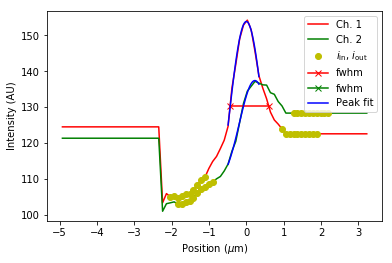

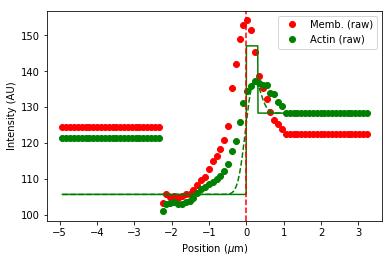

Thickness (nm), center cortex , cortical actin intensity (from fit) 308.6598349320573 0.1543300085358418 147.1058309883465
block id 1 time averaged 73
block id 2 time averaged 73
block id 3 time averaged 73
block id 4 time averaged 73
block id 5 time averaged 73
block id 6 time averaged 73
block id 7 time averaged 73
block id 1 time averaged 74
block id 2 time averaged 74
block id 3 time averaged 74
block id 4 time averaged 74
block id 5 time averaged 74
block id 6 time averaged 74
block id 7 time averaged 74
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 1.42141278e+01  2.18054469e-01 -1.46786044e-06  1.21931040e+02]
Actin Fit: [ 6.85709751e+02  1.35574728e+00  1.87559588e-01 -7.27519472e+01]


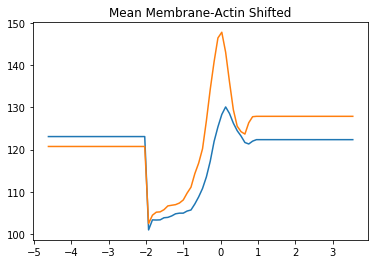

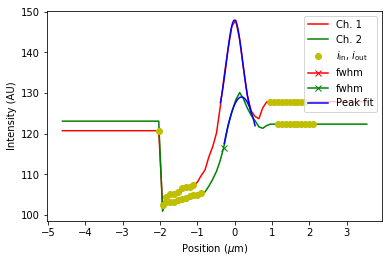

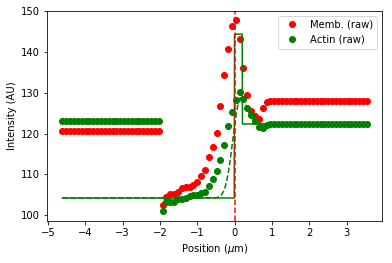

Thickness (nm), center cortex , cortical actin intensity (from fit) 208.32587891668243 0.10416147159790606 144.3982314215157
block id 1 time averaged 75
block id 2 time averaged 75
block id 3 time averaged 75
block id 4 time averaged 75
block id 5 time averaged 75
block id 6 time averaged 75
block id 7 time averaged 75
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.60431851e+01 3.31749763e-01 1.45306577e-06 1.17147253e+02]
Actin Fit: [ 20.22897623   0.36982836   0.1946792  110.6746451 ]


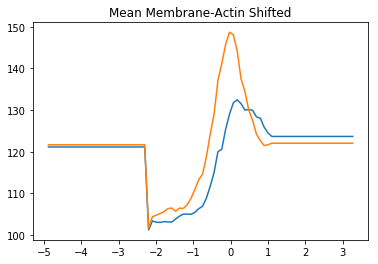

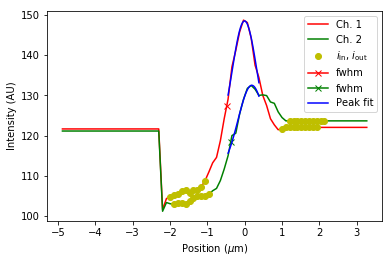

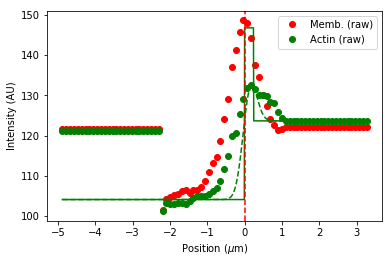

Thickness (nm), center cortex , cortical actin intensity (from fit) 244.38941743801325 0.12219616178477978 146.75636497968102
block id 1 time averaged 76
block id 2 time averaged 76
block id 3 time averaged 76
block id 4 time averaged 76
block id 5 time averaged 76
block id 6 time averaged 76
block id 7 time averaged 76
block id 1 time averaged 77
block id 2 time averaged 77
block id 3 time averaged 77
block id 4 time averaged 77
block id 5 time averaged 77
block id 6 time averaged 77
block id 7 time averaged 77
block id 1 time averaged 78
block id 2 time averaged 78
block id 3 time averaged 78
block id 4 time averaged 78
block id 5 time averaged 78
block id 6 time averaged 78
block id 7 time averaged 78
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 1.33834703e+01  2.52585632e-01 -4.66189338e-07  1.28207944e+02]
Actin Fit: [ 2.44061336e+05  1.11251000e+01  3.34675589e-01 -8.61575825e+03]


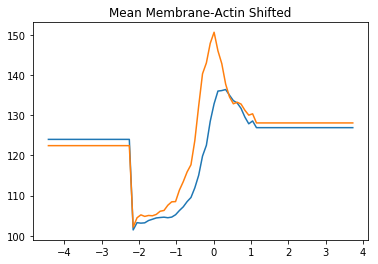

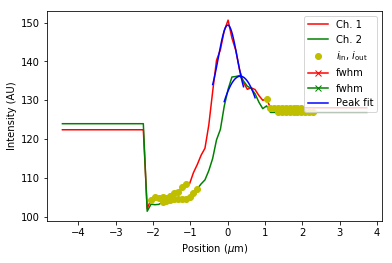

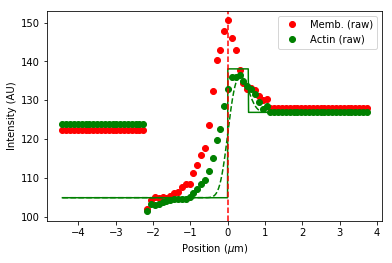

Thickness (nm), center cortex , cortical actin intensity (from fit) 556.546003903878 0.27827253576260125 138.08375926043402
block id 1 time averaged 79
block id 2 time averaged 79
block id 3 time averaged 79
block id 4 time averaged 79
block id 5 time averaged 79
block id 6 time averaged 79
block id 7 time averaged 79
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 9.16394899e+03  2.62014021e+00  5.76474782e-05 -1.23999575e+03]
Actin Fit: [2.50222898e+01 4.17902596e-01 9.08727070e-02 1.14666376e+02]


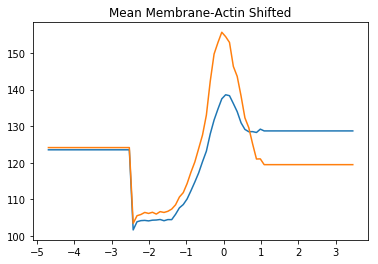

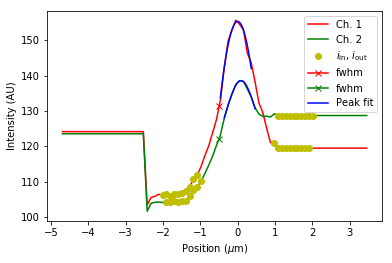

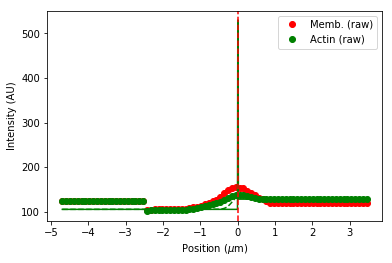

Thickness (nm), center cortex , cortical actin intensity (from fit) 19.799723211437016 0.00995750908396171 529.6906902091349
block id 1 time averaged 80
block id 2 time averaged 80
block id 3 time averaged 80
block id 4 time averaged 80
block id 5 time averaged 80
block id 6 time averaged 80
block id 7 time averaged 80
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.22102350e+01 2.88563179e-01 2.41515600e-06 1.26718602e+02]
Actin Fit: [ 5.34909539e+05  1.27312872e+01  1.17962658e-01 -1.66236519e+04]


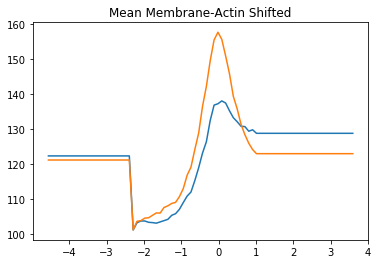

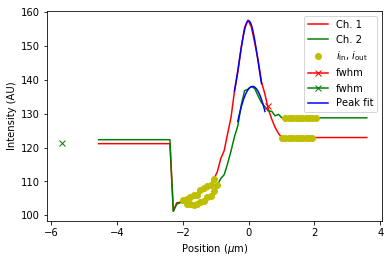

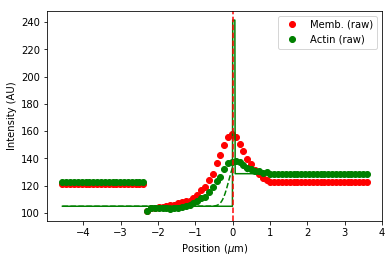

Thickness (nm), center cortex , cortical actin intensity (from fit) 65.05049067193856 0.03252766049196832 241.5617590691503
block id 1 time averaged 81
block id 2 time averaged 81
block id 3 time averaged 81
block id 4 time averaged 81
block id 5 time averaged 81
block id 6 time averaged 81
block id 7 time averaged 81
block id 1 time averaged 82
block id 2 time averaged 82
block id 3 time averaged 82
block id 4 time averaged 82
block id 5 time averaged 82
block id 6 time averaged 82
block id 7 time averaged 82
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 6.45771185e+01  4.54695239e-01 -1.14518929e-06  8.98516179e+01]
Actin Fit: [ 1.33795904e+04  4.81572659e+00  2.14186161e-01 -9.73503988e+02]


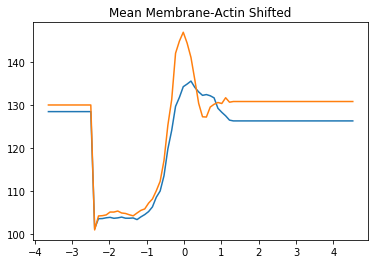

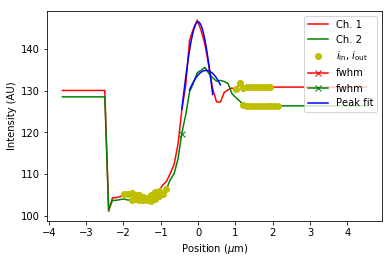

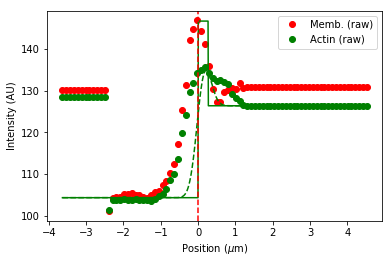

Thickness (nm), center cortex , cortical actin intensity (from fit) 272.48207258743776 0.1362398911044274 146.72623359519065
block id 1 time averaged 83
block id 2 time averaged 83
block id 3 time averaged 83
block id 4 time averaged 83
block id 5 time averaged 83
block id 6 time averaged 83
block id 7 time averaged 83
block id 1 time averaged 84
block id 2 time averaged 84
block id 3 time averaged 84
block id 4 time averaged 84
block id 5 time averaged 84
block id 6 time averaged 84
block id 7 time averaged 84
block id 1 time averaged 85
block id 2 time averaged 85
block id 3 time averaged 85
block id 4 time averaged 85
block id 5 time averaged 85
block id 6 time averaged 85
block id 7 time averaged 85
Membrane Fit: (Amp, Sigma, PeakPos, C) [7.17315270e+01 4.15524668e-01 6.57399254e-07 9.07406327e+01]
Actin Fit: [4.18702893e+00 1.74315574e-01 5.87457284e-02 1.27069868e+02]


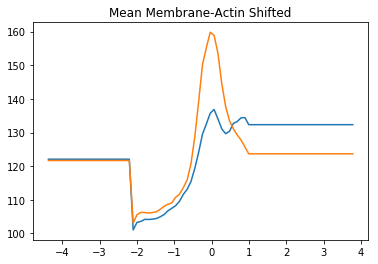

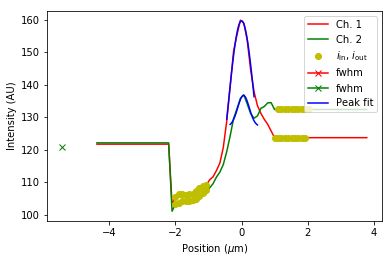

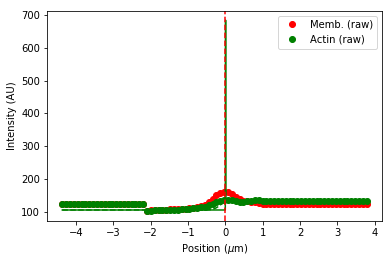

Thickness (nm), center cortex , cortical actin intensity (from fit) 10.531562168449645 0.005266438483478508 684.2730708680486
block id 1 time averaged 86
block id 2 time averaged 86
block id 3 time averaged 86
block id 4 time averaged 86
block id 5 time averaged 86
block id 6 time averaged 86
block id 7 time averaged 86
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 11.08599565   0.29063034   0.49193001 124.15904827]
Actin Fit: [  7.58931734   0.27882772   0.53912372 121.26216038]


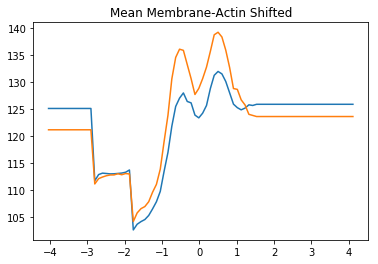

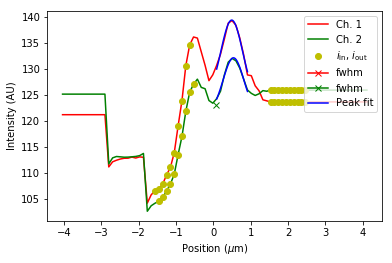

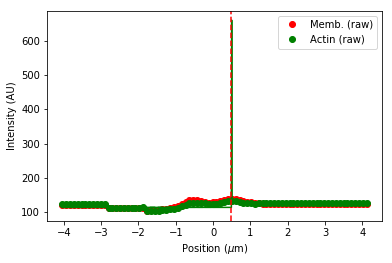

Thickness (nm), center cortex , cortical actin intensity (from fit) 8.842736773325488 0.4963513791812563 660.0286448670685
block id 1 time averaged 87
block id 2 time averaged 87
block id 3 time averaged 87
block id 4 time averaged 87
block id 5 time averaged 87
block id 6 time averaged 87
block id 7 time averaged 87
block id 1 time averaged 88
block id 2 time averaged 88
block id 3 time averaged 88
block id 4 time averaged 88
block id 5 time averaged 88
block id 6 time averaged 88
block id 7 time averaged 88
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.24671952e+01  3.02240048e-01 -1.08938172e-06  1.14663561e+02]
Actin Fit: [3.03115926e+01 3.15788526e-01 4.85903091e-02 1.14227619e+02]


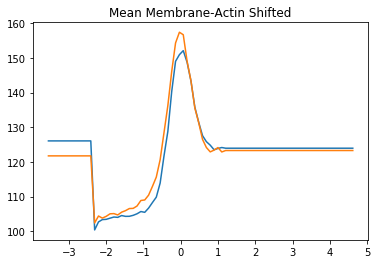

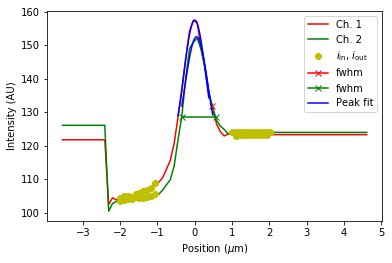

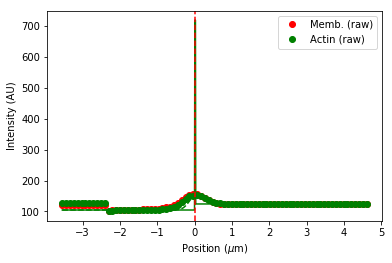

Thickness (nm), center cortex , cortical actin intensity (from fit) 26.433573799869748 0.013215697518217707 719.7436107220648
block id 1 time averaged 89
block id 2 time averaged 89
block id 3 time averaged 89
block id 4 time averaged 89
block id 5 time averaged 89
block id 6 time averaged 89
block id 7 time averaged 89
Membrane Fit: (Amp, Sigma, PeakPos, C) [5.92236773e+01 3.71963168e-01 9.20698051e-07 9.70547614e+01]
Actin Fit: [3.32425719e+01 3.09038499e-01 6.20686514e-02 1.11582325e+02]


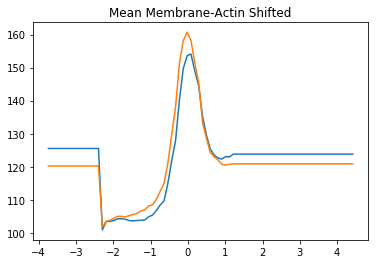

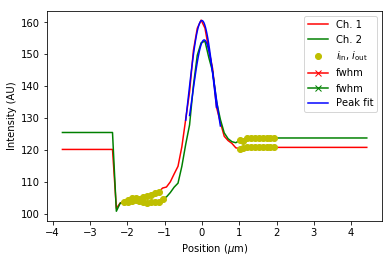

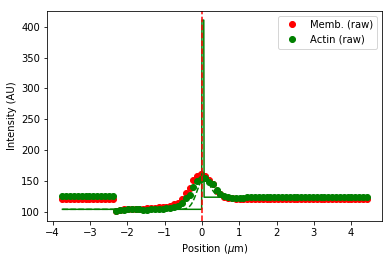

Thickness (nm), center cortex , cortical actin intensity (from fit) 57.618355924217205 0.028810098660159215 410.58009138831466
block id 1 time averaged 90
block id 2 time averaged 90
block id 3 time averaged 90
block id 4 time averaged 90
block id 5 time averaged 90
block id 6 time averaged 90
block id 7 time averaged 90
block id 1 time averaged 91
block id 2 time averaged 91
block id 3 time averaged 91
block id 4 time averaged 91
block id 5 time averaged 91
block id 6 time averaged 91
block id 7 time averaged 91
Membrane Fit: (Amp, Sigma, PeakPos, C) [6.60744032e+01 4.39775826e-01 1.22406493e-06 9.01538636e+01]
Actin Fit: [2.73837324e+01 3.48673138e-01 6.19998844e-02 1.10291705e+02]


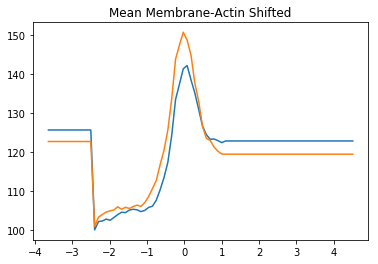

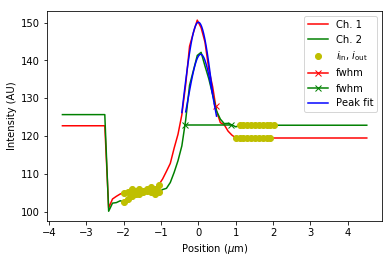

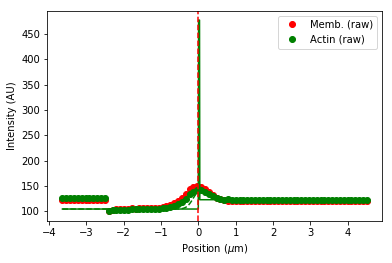

Thickness (nm), center cortex , cortical actin intensity (from fit) 31.62954654322142 0.015815997336538084 477.4143722396613
block id 1 time averaged 92
block id 2 time averaged 92
block id 3 time averaged 92
block id 4 time averaged 92
block id 5 time averaged 92
block id 6 time averaged 92
block id 7 time averaged 92
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 4.03089745e+01  3.47567265e-01 -3.36365237e-06  1.08116101e+02]
Actin Fit: [ 41.99696968   0.46094341   0.11254347 101.89103706]


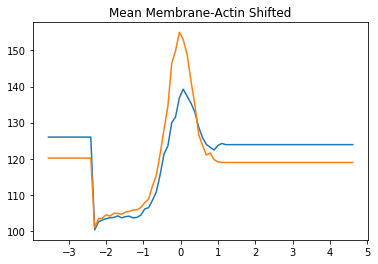

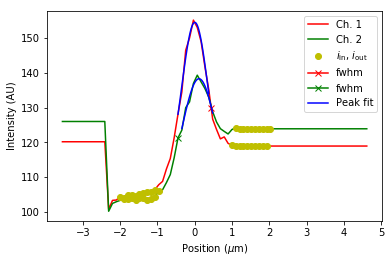

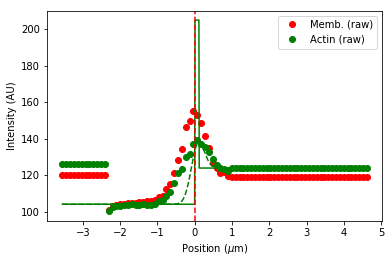

Thickness (nm), center cortex , cortical actin intensity (from fit) 109.43405797593255 0.05471366533560045 204.94335579592854
block id 1 time averaged 93
block id 2 time averaged 93
block id 3 time averaged 93
block id 4 time averaged 93
block id 5 time averaged 93
block id 6 time averaged 93
block id 7 time averaged 93
block id 1 time averaged 94
block id 2 time averaged 94
block id 3 time averaged 94
block id 4 time averaged 94
block id 5 time averaged 94
block id 6 time averaged 94
block id 7 time averaged 94
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 24.14605475   0.37578006   0.48078507 113.07062781]
Actin Fit: [ 10.27341759   0.31957091   0.56581848 120.23546348]


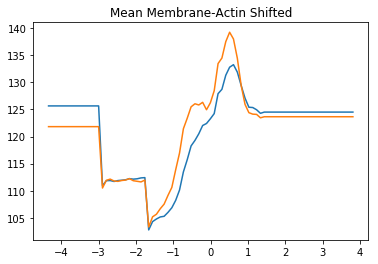

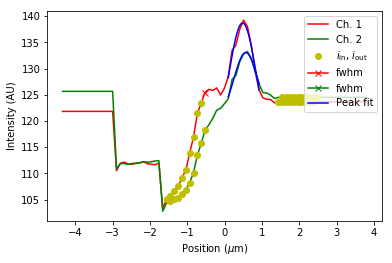

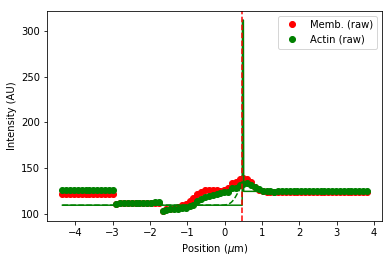

Thickness (nm), center cortex , cortical actin intensity (from fit) 32.650352455542865 0.49711024852284735 311.8315427241736
block id 1 time averaged 95
block id 2 time averaged 95
block id 3 time averaged 95
block id 4 time averaged 95
block id 5 time averaged 95
block id 6 time averaged 95
block id 7 time averaged 95
block id 1 time averaged 96
block id 2 time averaged 96
block id 3 time averaged 96
block id 4 time averaged 96
block id 5 time averaged 96
block id 6 time averaged 96
block id 7 time averaged 96
block id 1 time averaged 97
block id 2 time averaged 97
block id 3 time averaged 97
block id 4 time averaged 97
block id 5 time averaged 97
block id 6 time averaged 97
block id 7 time averaged 97
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.75119070e+01 3.40192416e-01 4.68130914e-06 1.13582768e+02]
Actin Fit: [ 20.95559329   0.35430674   0.11254542 111.6738199 ]


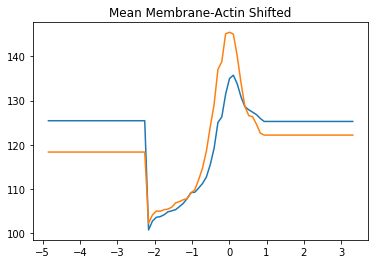

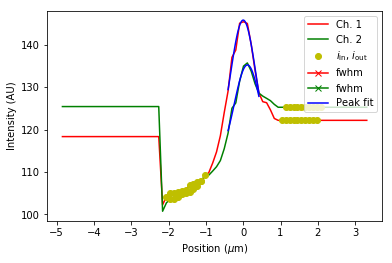

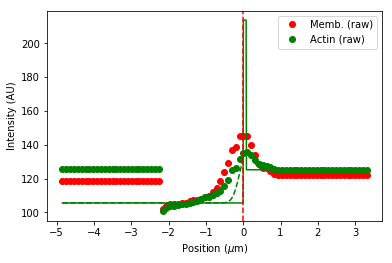

Thickness (nm), center cortex , cortical actin intensity (from fit) 79.62142200950922 0.03981539231389788 213.77160574925196
block id 1 time averaged 98
block id 2 time averaged 98
block id 3 time averaged 98
block id 4 time averaged 98
block id 5 time averaged 98
block id 6 time averaged 98
block id 7 time averaged 98
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 5.00988488e+04  5.43906207e+00  5.56981331e-01 -3.53497279e+03]
Actin Fit: [ 25.679135     0.50322314   0.57998979 109.14499753]


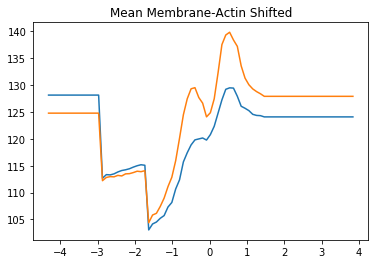

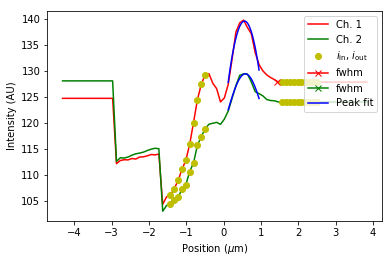

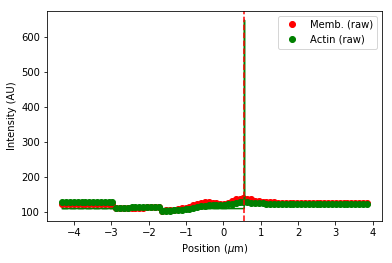

Thickness (nm), center cortex , cortical actin intensity (from fit) 8.727277976547056 0.5613449698266063 647.472439260574
block id 1 time averaged 99
block id 2 time averaged 99
block id 3 time averaged 99
block id 4 time averaged 99
block id 5 time averaged 99
block id 6 time averaged 99
block id 7 time averaged 99
block id 1 time averaged 100
block id 2 time averaged 100
block id 3 time averaged 100
block id 4 time averaged 100
block id 5 time averaged 100
block id 6 time averaged 100
block id 7 time averaged 100
block id 1 time averaged 101
block id 2 time averaged 101
block id 3 time averaged 101
block id 4 time averaged 101
block id 5 time averaged 101
block id 6 time averaged 101
block id 7 time averaged 101
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 13.82916842   0.28191602   0.59120342 125.88638747]
Actin Fit: [ 14.41089839   0.341236     0.60864381 115.90838418]


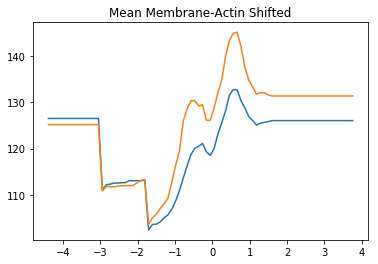

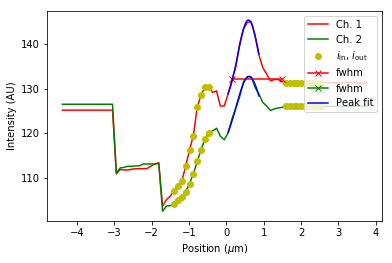

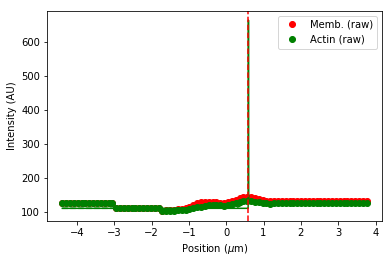

Thickness (nm), center cortex , cortical actin intensity (from fit) 10.041309797550223 0.5962240709030145 663.9073494804742
block id 1 time averaged 102
block id 2 time averaged 102
block id 3 time averaged 102
block id 4 time averaged 102
block id 5 time averaged 102
block id 6 time averaged 102
block id 7 time averaged 102
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 5.02472068e+01  4.11328657e-01 -1.27031164e-06  9.88008386e+01]
Actin Fit: [ 26.98598697   0.47967307   0.17493281 108.82475237]


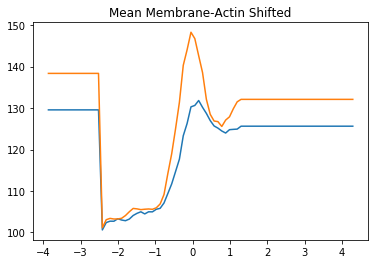

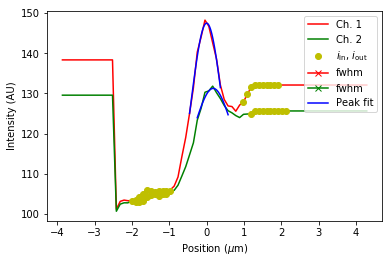

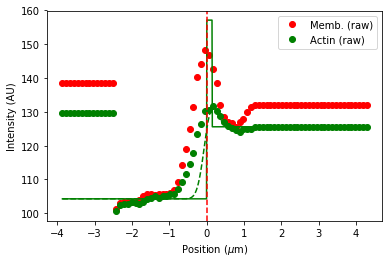

Thickness (nm), center cortex , cortical actin intensity (from fit) 147.17672609900603 0.07358709273786435 157.07610642624718
block id 1 time averaged 103
block id 2 time averaged 103
block id 3 time averaged 103
block id 4 time averaged 103
block id 5 time averaged 103
block id 6 time averaged 103
block id 7 time averaged 103
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.44765214e+01 2.74987413e-01 7.83507703e-07 1.17277957e+02]
Actin Fit: [1.39103922e+01 3.00503909e-01 2.34035843e-02 1.17596044e+02]


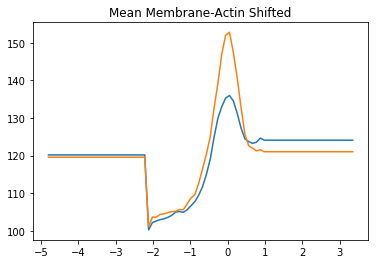

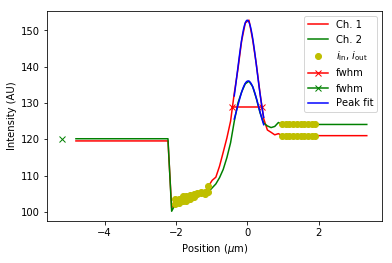

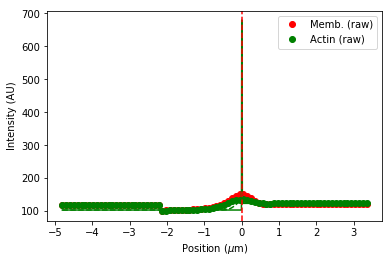

Thickness (nm), center cortex , cortical actin intensity (from fit) 15.448015622716477 0.007724791319061591 679.930001912167
block id 1 time averaged 104
block id 2 time averaged 104
block id 3 time averaged 104
block id 4 time averaged 104
block id 5 time averaged 104
block id 6 time averaged 104
block id 7 time averaged 104
Membrane Fit: (Amp, Sigma, PeakPos, C) [3.40210595e+01 3.21006145e-01 3.00141505e-07 1.09249541e+02]
Actin Fit: [46.68721848  0.49052909  0.11452835 97.5567059 ]


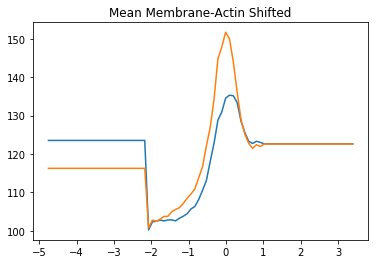

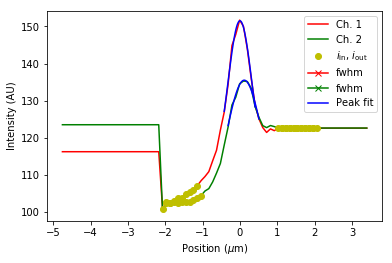

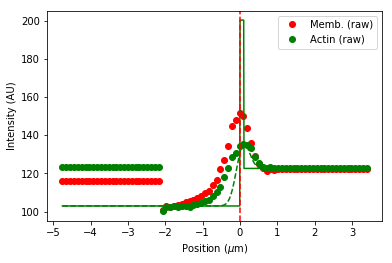

Thickness (nm), center cortex , cortical actin intensity (from fit) 105.78927376286467 0.0528949370229375 200.31033958992026
block id 1 time averaged 105
block id 2 time averaged 105
block id 3 time averaged 105
block id 4 time averaged 105
block id 5 time averaged 105
block id 6 time averaged 105
block id 7 time averaged 105
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 1.65000252e+01  2.61209741e-01 -1.39189692e-07  1.21826799e+02]
Actin Fit: [2.49240645e+01 3.86536007e-01 1.01772286e-01 1.07422397e+02]


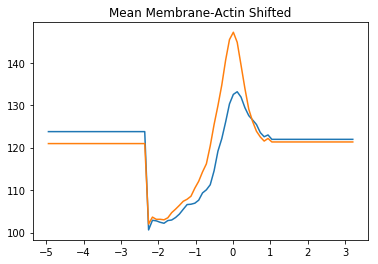

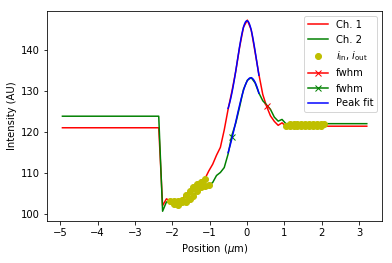

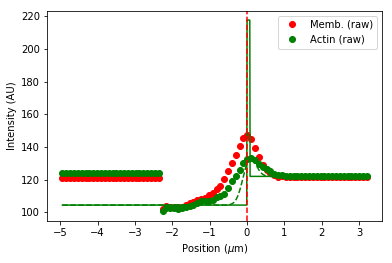

Thickness (nm), center cortex , cortical actin intensity (from fit) 77.00360234757044 0.03850166198409333 217.62253652729325
block id 1 time averaged 106
block id 2 time averaged 106
block id 3 time averaged 106
block id 4 time averaged 106
block id 5 time averaged 106
block id 6 time averaged 106
block id 7 time averaged 106
Membrane Fit: (Amp, Sigma, PeakPos, C) [  7.18397968   0.24588025   0.56556721 125.39426445]
Actin Fit: [ 12.23668642   0.42860685   0.48439455 119.22796469]


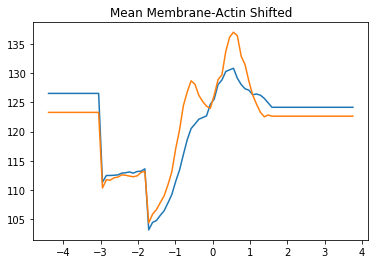

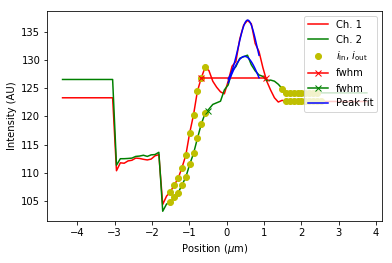

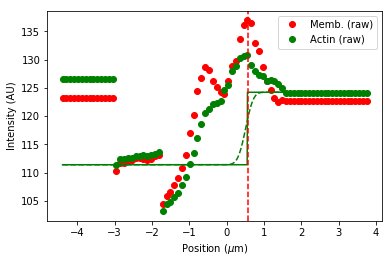

Thickness (nm), center cortex , cortical actin intensity (from fit) 7.4454796057876145 0.5618444726351919 26.123546066339976
block id 1 time averaged 107
block id 2 time averaged 107
block id 3 time averaged 107
block id 4 time averaged 107
block id 5 time averaged 107
block id 6 time averaged 107
block id 7 time averaged 107
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.04356662e+01  2.41753634e-01 -2.24104240e-06  1.22160324e+02]
Actin Fit: [5.57123904e+01 4.85120484e-01 8.25897114e-02 9.10458230e+01]


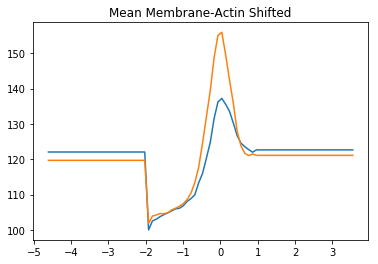

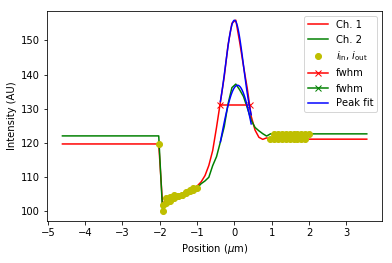

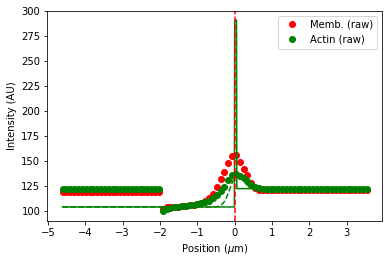

Thickness (nm), center cortex , cortical actin intensity (from fit) 53.50481661619873 0.02675016726569582 291.17726742823163
block id 1 time averaged 108
block id 2 time averaged 108
block id 3 time averaged 108
block id 4 time averaged 108
block id 5 time averaged 108
block id 6 time averaged 108
block id 7 time averaged 108
Membrane Fit: (Amp, Sigma, PeakPos, C) [2.22660473e+01 2.84167799e-01 3.69791968e-06 1.17596123e+02]
Actin Fit: [ 1.77834127e+05  8.13099061e+00  1.28286030e-01 -8.58941182e+03]


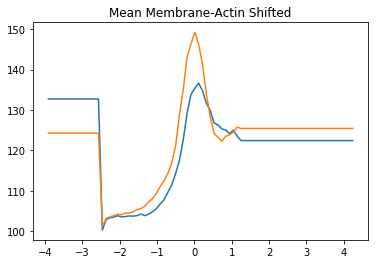

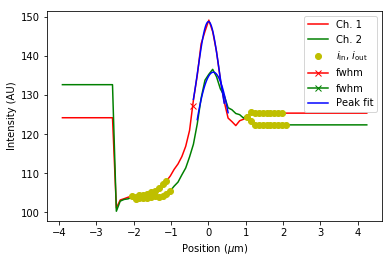

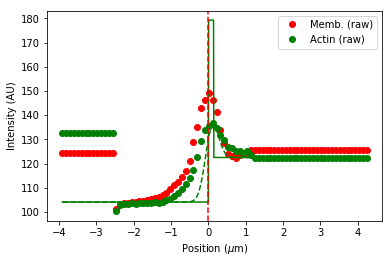

Thickness (nm), center cortex , cortical actin intensity (from fit) 142.80166231434768 0.07140452907684985 179.29175016443222
block id 1 time averaged 109
block id 2 time averaged 109
block id 3 time averaged 109
block id 4 time averaged 109
block id 5 time averaged 109
block id 6 time averaged 109
block id 7 time averaged 109
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.26144671e+01  2.94405178e-01 -3.25465539e-06  1.19312533e+02]
Actin Fit: [6.05765063e+01 5.12702777e-01 9.00259332e-02 9.14140306e+01]


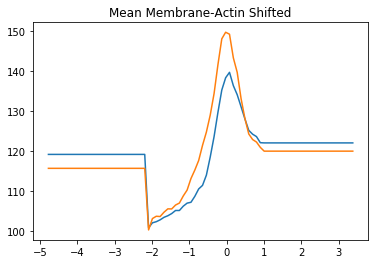

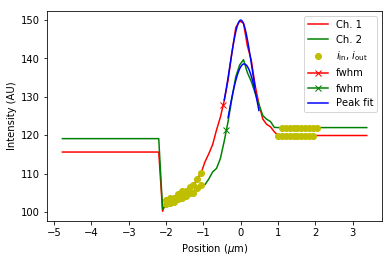

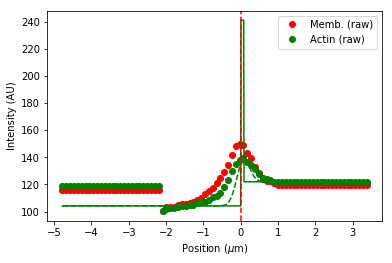

Thickness (nm), center cortex , cortical actin intensity (from fit) 82.13232074501968 0.0410629057171196 241.39296629370105
block id 1 time averaged 110
block id 2 time averaged 110
block id 3 time averaged 110
block id 4 time averaged 110
block id 5 time averaged 110
block id 6 time averaged 110
block id 7 time averaged 110
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 4.74916600e+05  1.29354983e+01  3.72194769e-01 -1.45141139e+04]
Actin Fit: [  6.62757131   0.27566417   0.5735992  120.78888654]


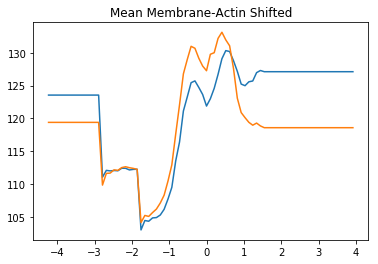

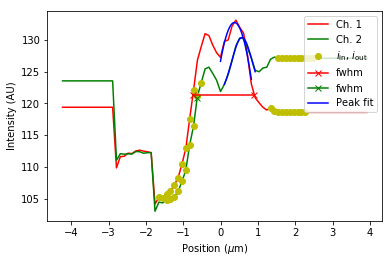

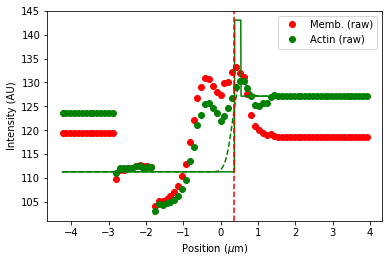

Thickness (nm), center cortex , cortical actin intensity (from fit) 176.09671243921298 0.46024312532089046 143.04252781566984
block id 1 time averaged 111
block id 2 time averaged 111
block id 3 time averaged 111
block id 4 time averaged 111
block id 5 time averaged 111
block id 6 time averaged 111
block id 7 time averaged 111
block id 1 time averaged 112
block id 2 time averaged 112
block id 3 time averaged 112
block id 4 time averaged 112
block id 5 time averaged 112
block id 6 time averaged 112
block id 7 time averaged 112
block id 1 time averaged 113
block id 2 time averaged 113
block id 3 time averaged 113
block id 4 time averaged 113
block id 5 time averaged 113
block id 6 time averaged 113
block id 7 time averaged 113
block id 1 time averaged 114
block id 2 time averaged 114
block id 3 time averaged 114
block id 4 time averaged 114
block id 5 time averaged 114
block id 6 time averaged 114
block id 7 time averaged 114
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 2.06927042e+05  9.659

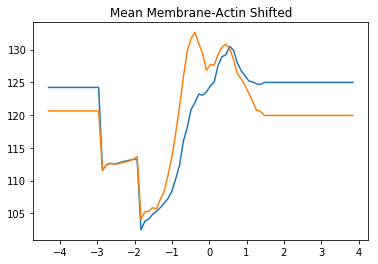

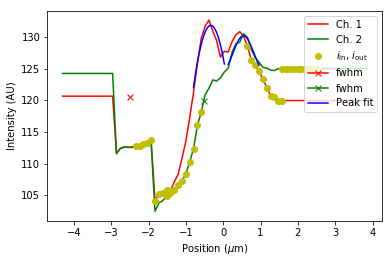

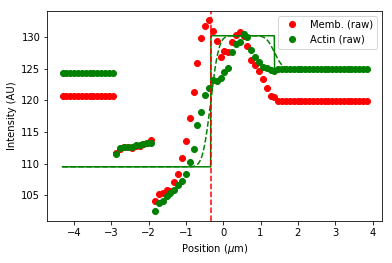

Thickness (nm), center cortex , cortical actin intensity (from fit) 1702.7112770256251 0.5172502788228177 130.17956151902575
block id 1 time averaged 115
block id 2 time averaged 115
block id 3 time averaged 115
block id 4 time averaged 115
block id 5 time averaged 115
block id 6 time averaged 115
block id 7 time averaged 115
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 16.22678815   0.37311389   0.36963291 117.28786014]
Actin Fit: [  2.11231445   0.17572886   0.46862865 123.76780196]


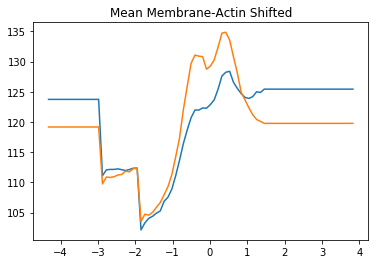

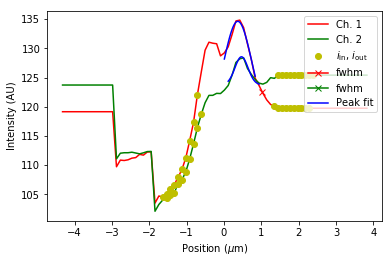

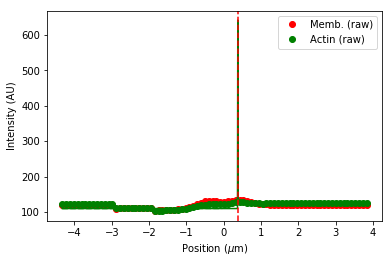

Thickness (nm), center cortex , cortical actin intensity (from fit) 7.188985899216241 0.37322740117688685 641.9221866286179
block id 1 time averaged 116
block id 2 time averaged 116
block id 3 time averaged 116
block id 4 time averaged 116
block id 5 time averaged 116
block id 6 time averaged 116
block id 7 time averaged 116
block id 1 time averaged 117
block id 2 time averaged 117
block id 3 time averaged 117
block id 4 time averaged 117
block id 5 time averaged 117
block id 6 time averaged 117
block id 7 time averaged 117
Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.13761359e+01  3.16514032e-01 -1.32004977e-06  1.16428693e+02]
Actin Fit: [1.77667996e+01 2.99378218e-01 4.62599835e-02 1.20113469e+02]


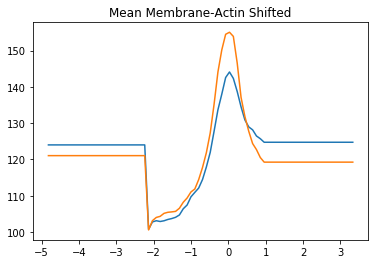

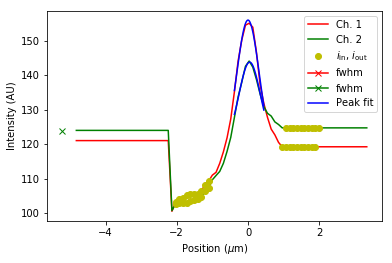

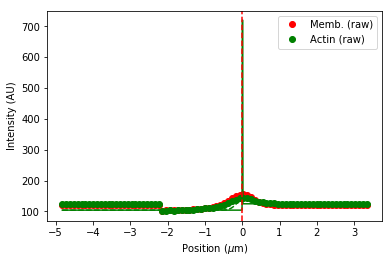

Thickness (nm), center cortex , cortical actin intensity (from fit) 19.809993830857298 0.009903676865654068 720.5579844871953
block id 1 time averaged 118
block id 2 time averaged 118
block id 3 time averaged 118
block id 4 time averaged 118
block id 5 time averaged 118
block id 6 time averaged 118
block id 7 time averaged 118
block id 1 time averaged 119
block id 2 time averaged 119
block id 3 time averaged 119
block id 4 time averaged 119
block id 5 time averaged 119
block id 6 time averaged 119
block id 7 time averaged 119
block id 1 time averaged 120
block id 2 time averaged 120
block id 3 time averaged 120
block id 4 time averaged 120
block id 5 time averaged 120
block id 6 time averaged 120
block id 7 time averaged 120
Thickness (min) 4.0048111714577805 nm
Thickness (median) 105.07436262959901 nm
Thickness (max) 1935.1507150830405 nm


Loading BokehJS ...

X: 145.96443939208984 Y:  0.2034655999932037
Standard deviation: 76.35728087298871
X: 134.6991985545439 Y:  0.2183849832491204
Standard deviation: 76.35728087298871


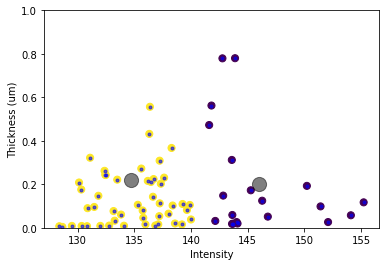

X: 25.812500000000014 Y:  0.2858345162374417
Standard deviation: 2167.231278287257
X: 86.94871794871794 Y:  0.15539081092233537
Standard deviation: 2167.231278287257


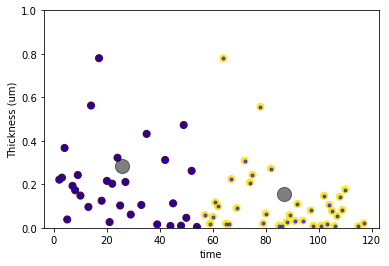

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 20.17449924   0.3745492    0.36956399 121.29754172]
Actin Fit: [ 13.72457205   0.42722796   0.53331    119.24477262]


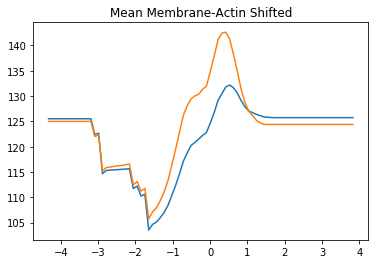

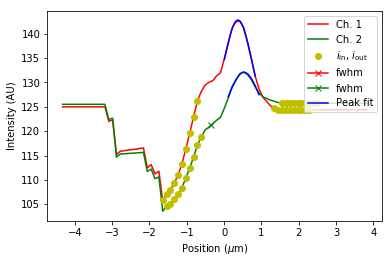

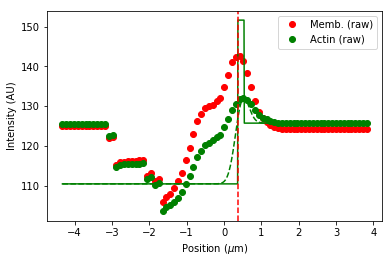

Thickness (nm), center cortex , cortical actin intensity (from fit) 168.0886387935197 0.45360830737392305 151.6754653043993
CPU times: user 3min 59s, sys: 18.3 s, total: 4min 17s
Wall time: 4min 8s


In [4]:
%%time
#Fit all blocks

Thickness = []
Intensity = []
PeakActin = []
DataActin = []
PeakMembrane = []
DataMembrane = []
Time = []
ID = []
MegaBlockActin = []
MegaBlockMembrane = []
BlockAverageActin = []
BlockAverageMembrane = []
for t in range(0, SimTime):
  BlockActin = []
  BlockMembrane = []
  for i in range(0, totallength):
    
     
    
     print('block id', i+1, 'time averaged', t) 
     currentid = i+1
     ID.append(i + 1)
     Actin = blockimageActin[i]
     Membrane = blockimageMembrane[i]
     X = []
     I = []
     membraneimageX = []
     membraneimageI = []
     strip = Actin[:Actin.shape[0],t]
     membraneimagestrip = Membrane[:Membrane.shape[0],t]
     for j in range(strip.shape[0]):
           X.append(j * Xcalibration)
           I.append(strip[j])
        
        
     X = np.asarray(X)
     I = np.asarray(I)
     for j in range(membraneimagestrip.shape[0]):    
           membraneimageX.append(j * Xcalibration)
           membraneimageI.append(membraneimagestrip[j]) 
           
     membraneimageX = np.asarray(membraneimageX)
     membraneimageI = np.asarray(membraneimageI)
     StripFitTime(X, I,membraneimageX,membraneimageI,Time_unit,Xcalibration,  Fitaround, psf, inisigmaguess, showaftertime, Thickness, Intensity, BlockActin, BlockMembrane, Time, t)
  if(len(BlockActin) > 0 and len(BlockMembrane)> 0 ):  
     ShiftFit(BlockActin, BlockMembrane,BlockAverageActin,BlockAverageMembrane, Time_unit, Xcalibration, Fitaround
             , psf, inisigmaguess, showaftertime,Thickness, Intensity,   Time, t) 
     #clear_output(wait=True)
   
print("Thickness (min)",np.min(Thickness) *1000, "nm")
print("Thickness (median)",np.median(Thickness) *1000, "nm")
print("Thickness (max)",np.max(Thickness) *1000, "nm")
 
Thickness_intensity = np.column_stack([Thickness, Intensity]) 
Thickness_time= np.column_stack([Thickness, Time])


hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
show(p)


num_clusters = 2
show_intensity_plot(Thickness_intensity, ymin = 0, ymax = 1, num_clusters = num_clusters )
    
show_intensity_plot(Thickness_time, ymin = 0, ymax = 1, num_clusters = num_clusters, title = 'time' )

FinalThickness = []
FinalIntensity = []
FinalTime = []
FinalShiftFit(BlockAverageActin, BlockAverageMembrane, Time_unit, Xcalibration, Fitaround
             , psf, inisigmaguess, showaftertime,FinalThickness, FinalIntensity,   FinalTime, 0)
